In [1]:
import json
import string
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib as mpl
import matplotlib.pyplot as plt
from britain_elects_utils import (parties,
                                  read_data,
                                  process_wvi_data,
                                  null_values_plot,
                                  plot_vote_intention)
from polling_report_history import read_historical_polling_report
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

with open("mpl_params.json", "r") as f:
    mpl_params = json.load(f)
mpl.rcParams.update(mpl_params)

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("./britain_elects_all/britain_elects_all.csv", index_col=0)
chars_to_keep = string.ascii_letters + string.digits + "%- "
df["full_text"] = df["full_text"].str.replace("\n", " ")
df["full_text"] = df["full_text"].apply(lambda x: ''.join([char for char in x if char in chars_to_keep]).lower())

In [3]:
wcloud = wordcloud.WordCloud(background_color='white', width=1500, height=800).generate(' '.join(df["full_text"]))

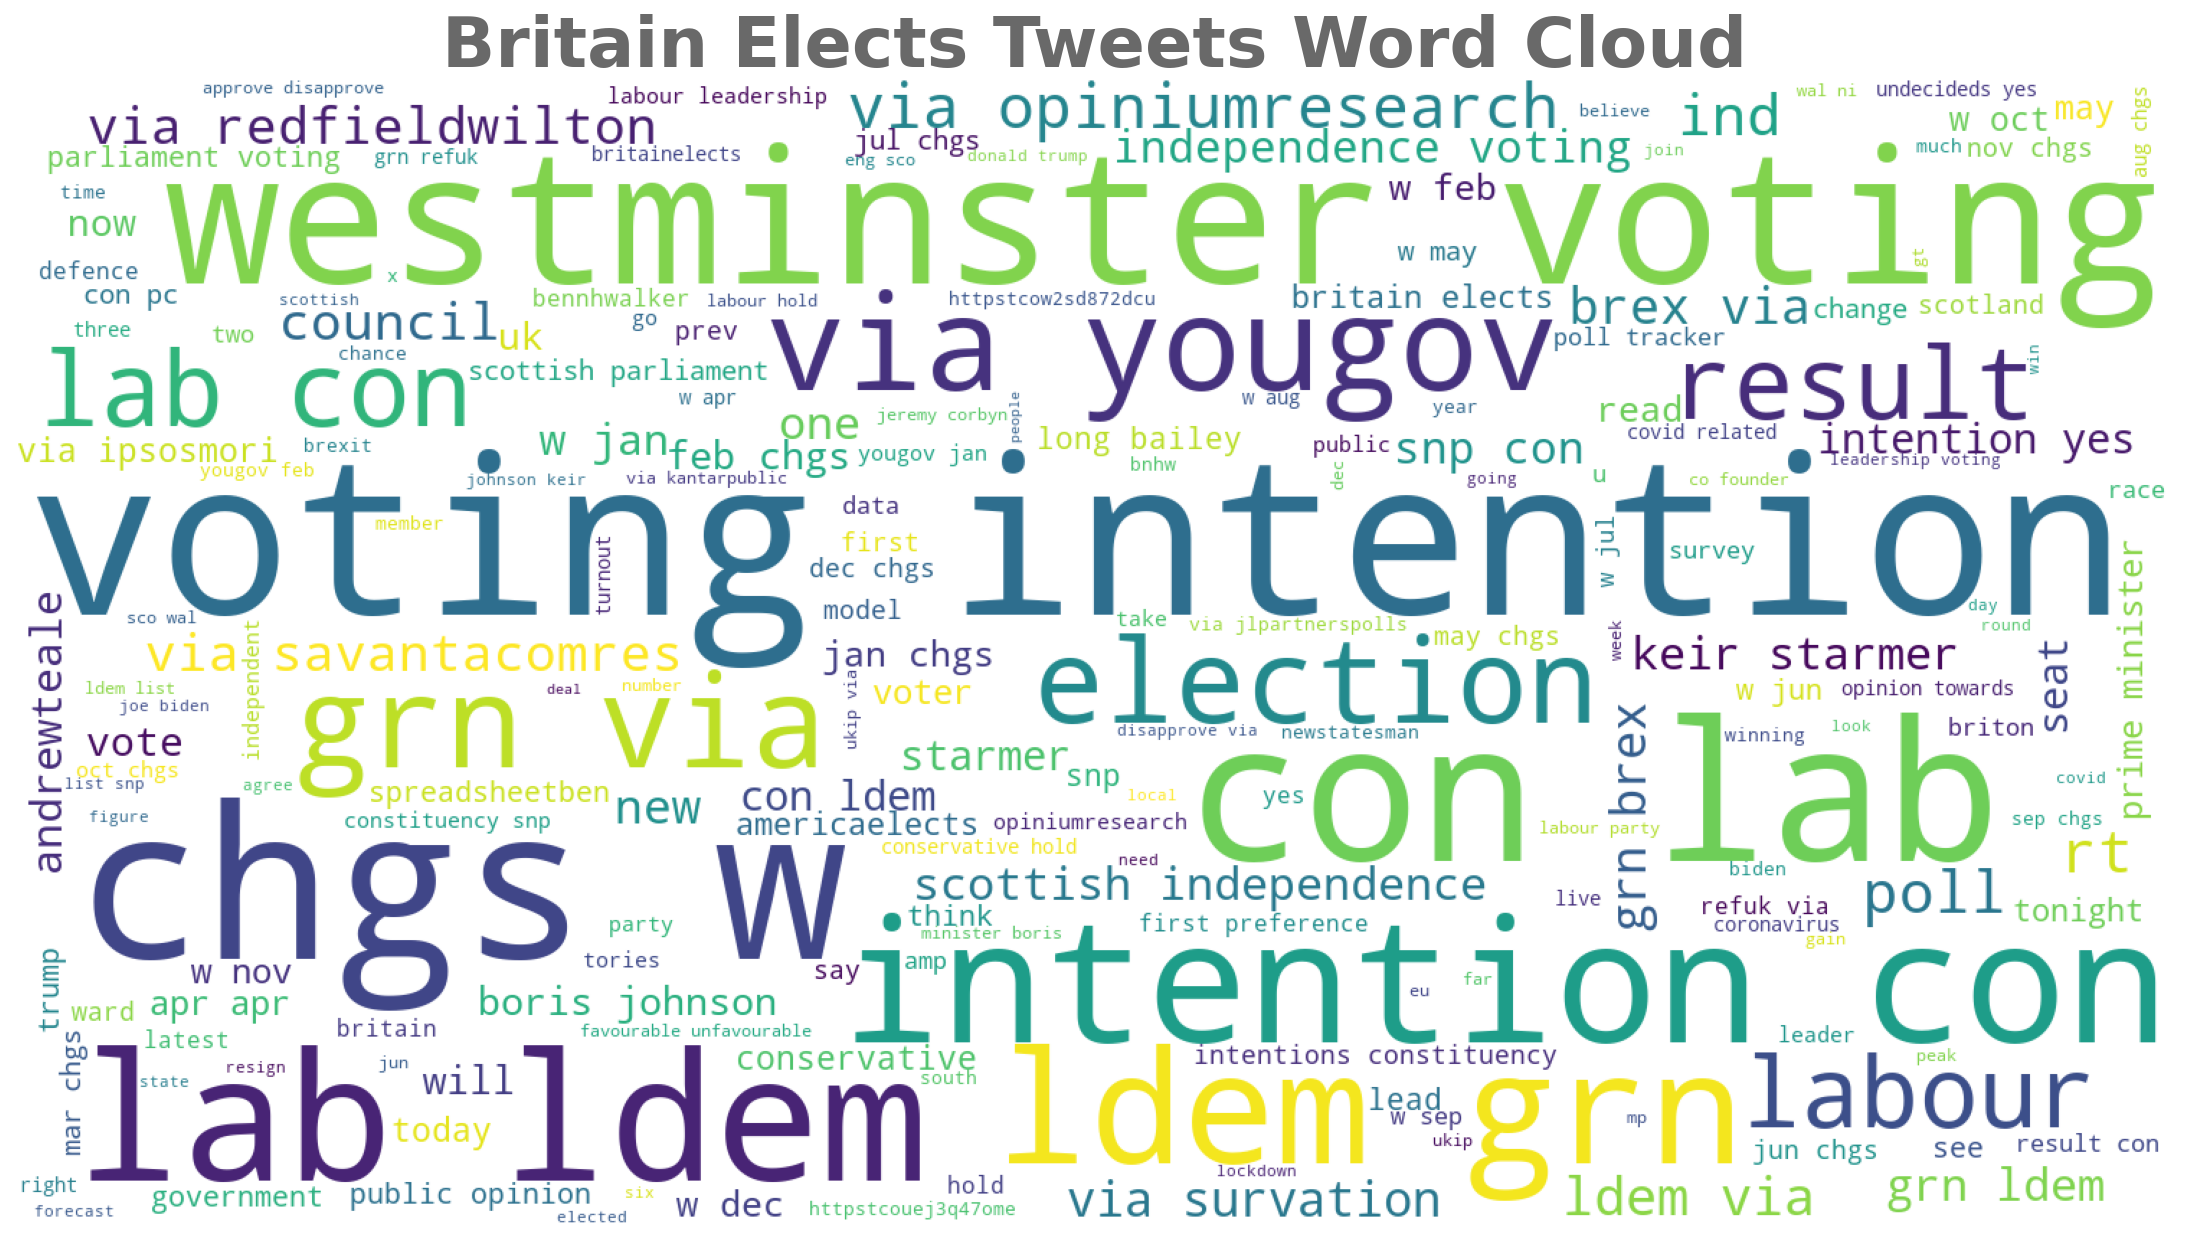

In [4]:
plt.figure(figsize=(15, 8), facecolor=None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.title("Britain Elects Tweets Word Cloud", fontweight="bold", fontsize=35);

In [5]:
df = read_data("britain_elects_wvi_data")
df = process_wvi_data(df)

In [6]:
df.tail()

created_at           source      start        end  \
date                                                                    
2021-02-26 2021-02-27 20:07:51  OpiniumResearch 2021-02-24 2021-02-26   
2021-02-25 2021-03-01 17:01:21        Survation 2021-02-23 2021-02-25   
2021-02-28 2021-03-02 18:59:49    SavantaComRes 2021-02-26 2021-02-28   
2021-03-04 2021-03-04 17:50:36           YouGov 2021-03-03 2021-03-04   
2021-03-07 2021-03-10 14:51:44    SavantaComRes 2021-03-05 2021-03-07   

           change_info  GRN  GRN_change  LAB  LAB_change  LDEM  ...  \
date                                                            ...   
2021-02-26      12 Feb  4.0        -1.0   36          -1   7.0  ...   
2021-02-25      06 Feb  6.0        -1.0   34           1   7.0  ...   
2021-02-28      21 Feb  3.0         0.0   36          -2   7.0  ...   
2021-03-04      26 Feb  7.0         0.0   32          -4   6.0  ...   
2021-03-07      28 Feb  4.0         1.0   36           0   8.0  ...   

            CON_change  BREX  BREX_change  REFUK  REFUK_change  UKIP  \
date                                                                   
2021-02-26         1.0   NaN          NaN    NaN           NaN   NaN   
2021-02-25         3.0   NaN          NaN    NaN           NaN   NaN   
2021-02-28         3.0   NaN          NaN    NaN           NaN   NaN   
2021-03-04         4.0   NaN          NaN    NaN           NaN   NaN   
2021-03-07        -1.0   NaN          NaN    NaN           NaN   NaN   

            UKIP_change  OTH  OTH_change  collection_source  
date                                                         
2021-02-26          NaN  NaN         NaN      britainelects  
2021-02-25          NaN  NaN         NaN      britainelects  
2021-02-28          NaN  NaN         NaN      britainelects  
2021-03-04          NaN  NaN         NaN      britainelects  
2021-03-07          NaN  NaN         NaN      britainelects  

[5 rows x 24 columns]

In [7]:
histo = read_historical_polling_report()
histo.head()

source        end  CON  LAB  LDEM  UKIP  GRN  \
date                                                                
2019-12-11      DeltapollUK 2019-12-11   45   35    10   NaN  3.0   
2019-12-11     KantarPublic 2019-12-11   44   32    13   NaN  3.0   
2019-12-11      BMGResearch 2019-12-11   41   32    14   NaN  3.0   
2019-12-11  OpiniumResearch 2019-12-11   45   33    12   NaN  2.0   
2019-12-11        Panelbase 2019-12-11   43   34    11   NaN  3.0   

           collection_source  
date                          
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh

In [8]:
df = pd.concat([histo, df]).sort_index()

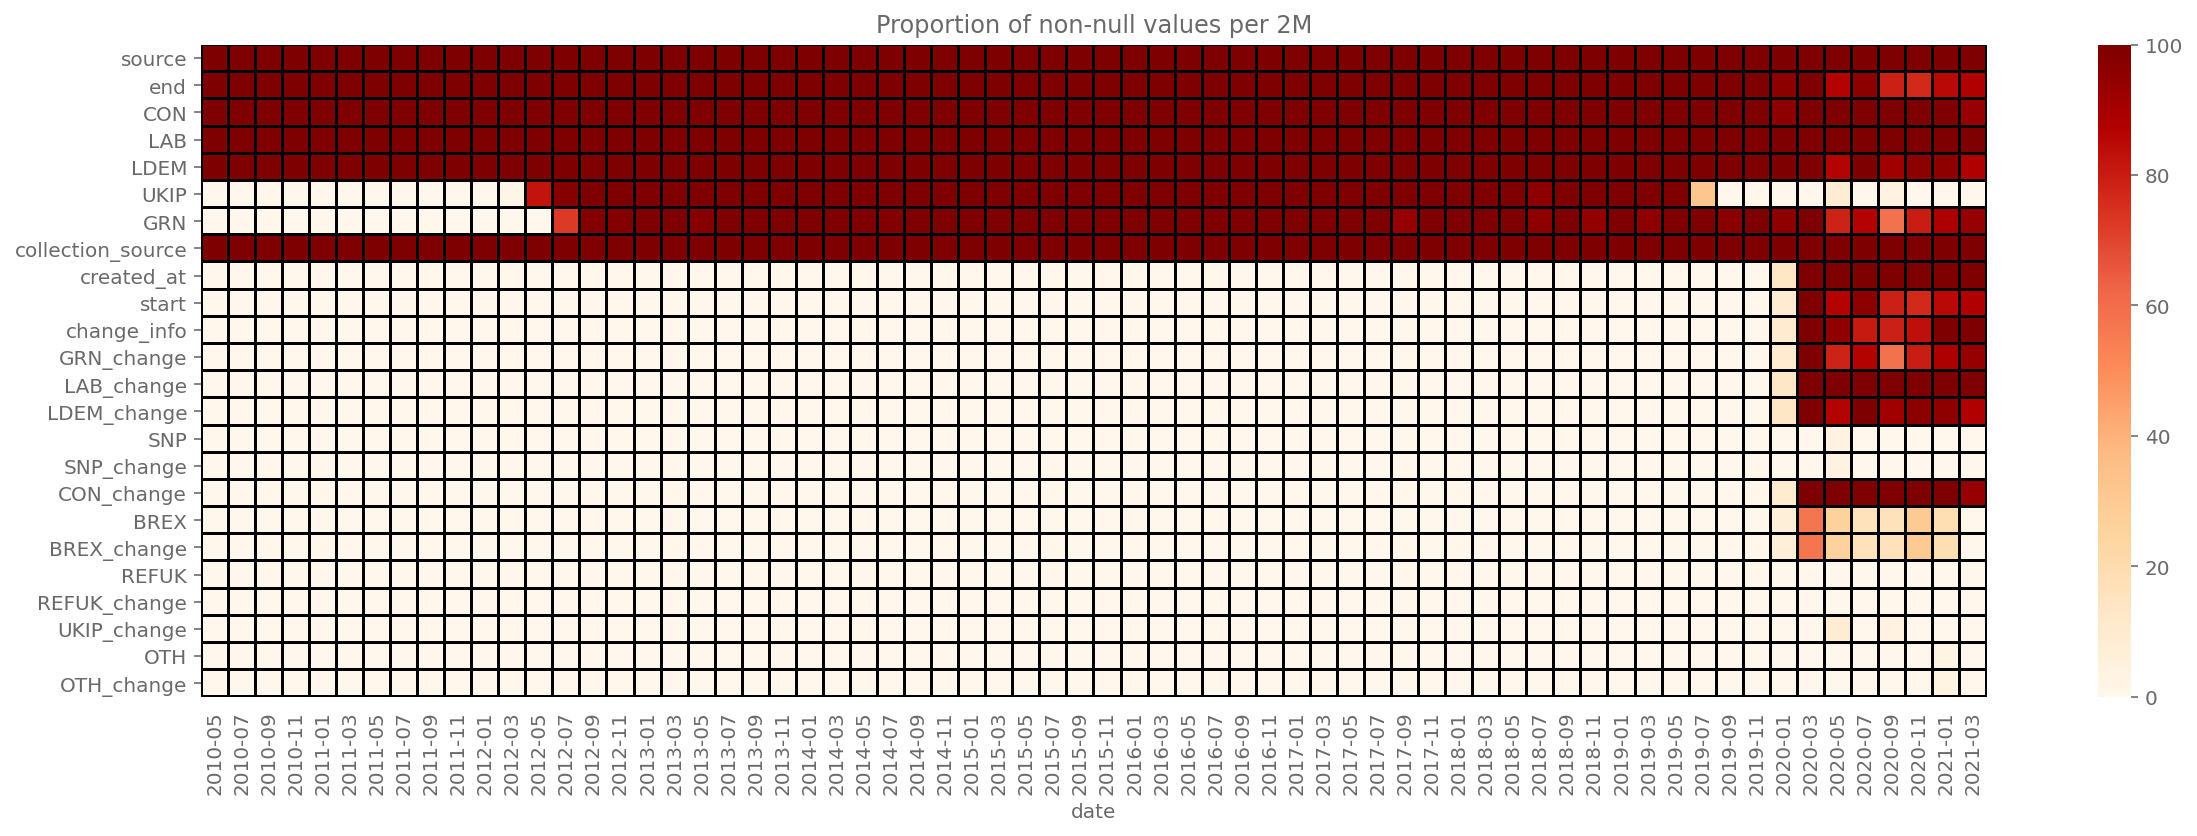

In [9]:
figsize = (20, 6)
freq = "2M"
fig, ax = plt.subplots(1, 1, figsize=figsize)
null_counts = df.resample(freq).agg({col: lambda s: 100*(s.notnull().sum()/len(s)) for col in df.columns})
sns.heatmap(null_counts.to_period(freq).T, cmap="OrRd", linewidths=1, linecolor="black", ax=ax)
ax.set_title(f"Proportion of non-null values per {freq}");

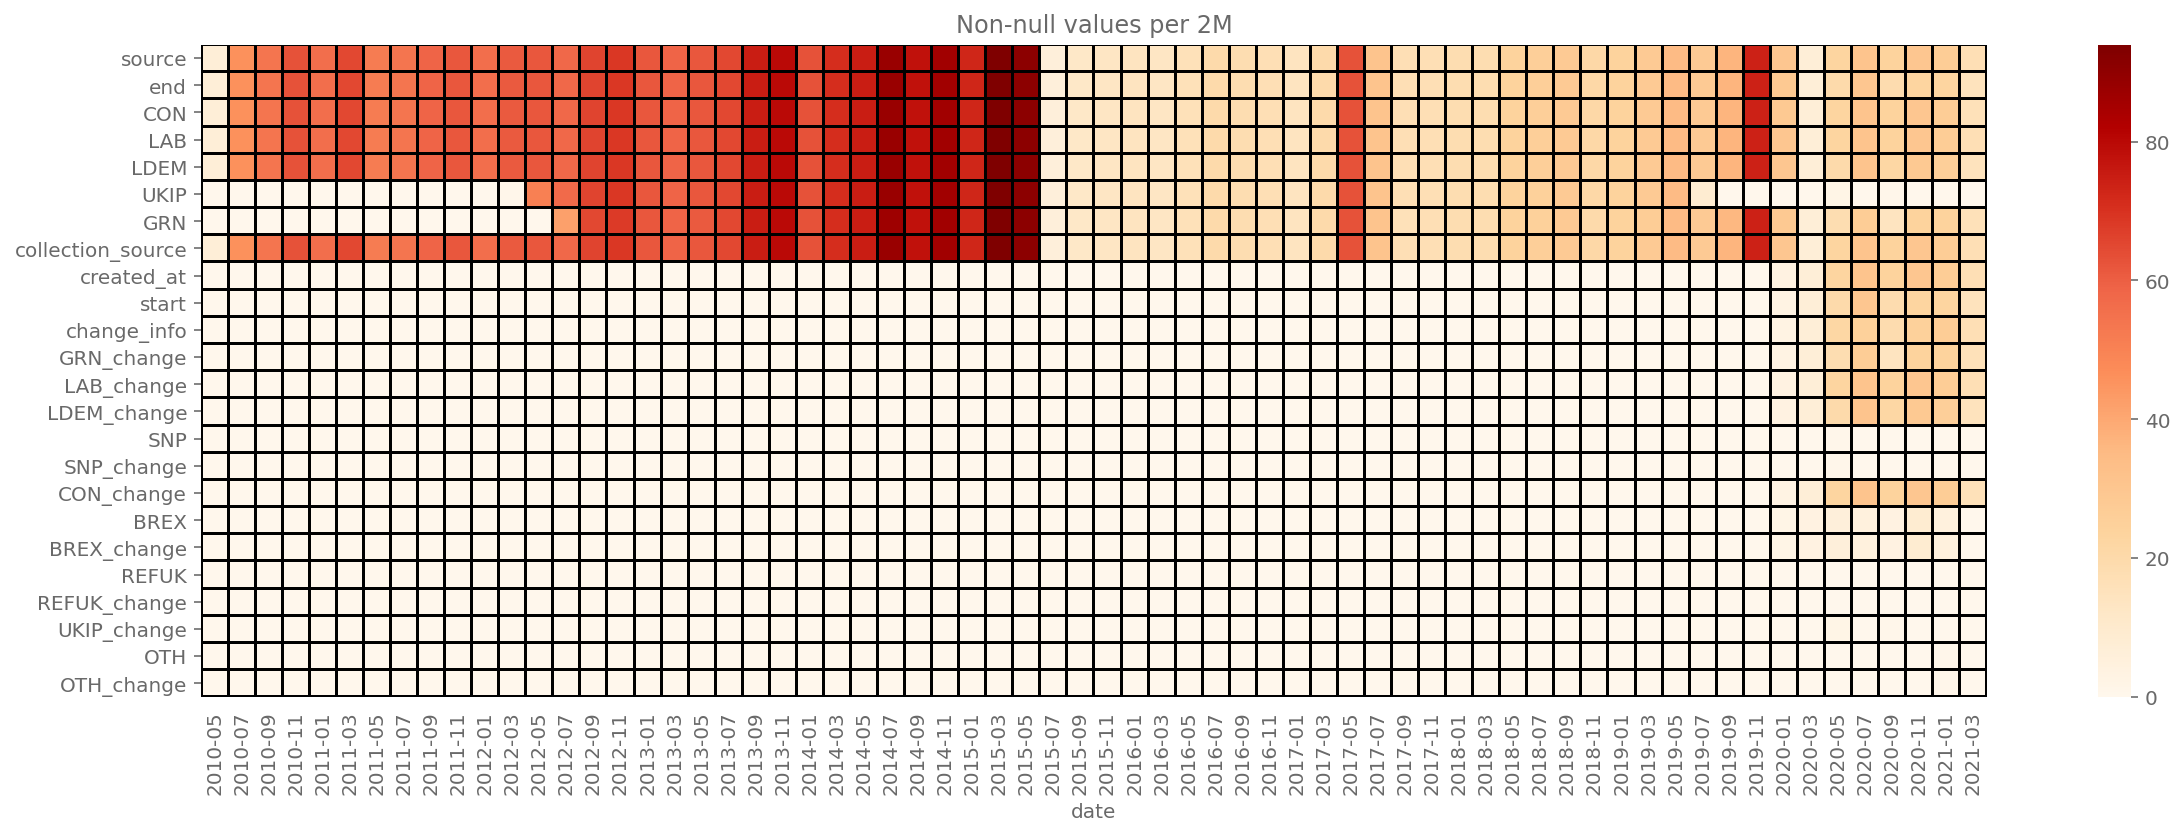

In [10]:
figsize = (20, 6)
freq = "2M"
fig, ax = plt.subplots(1, 1, figsize=figsize)
null_counts = df.resample(freq).agg({col: lambda s: s.notnull().sum() for col in df.columns})
sns.heatmap(null_counts.to_period(freq).T, cmap="OrRd", linewidths=1, linecolor="black", ax=ax)
ax.set_title(f"Non-null values per {freq}");

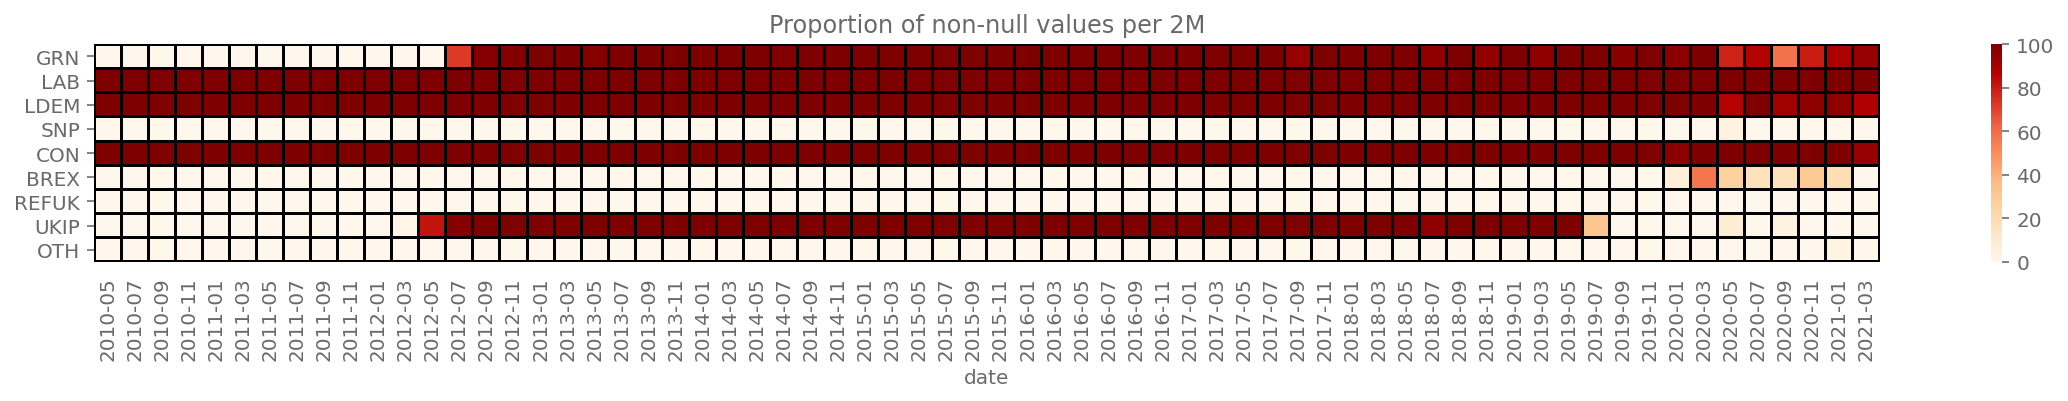

In [11]:
figsize = (20, 2)
freq = "2M"
fig, ax = plt.subplots(1, 1, figsize=figsize)
null_counts = df.resample(freq).agg({col: lambda s: 100*(s.notnull().sum()/len(s)) for col in parties})
sns.heatmap(null_counts.to_period(freq).T, cmap="OrRd", linewidths=1, linecolor="black", ax=ax)
ax.set_title(f"Proportion of non-null values per {freq}")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

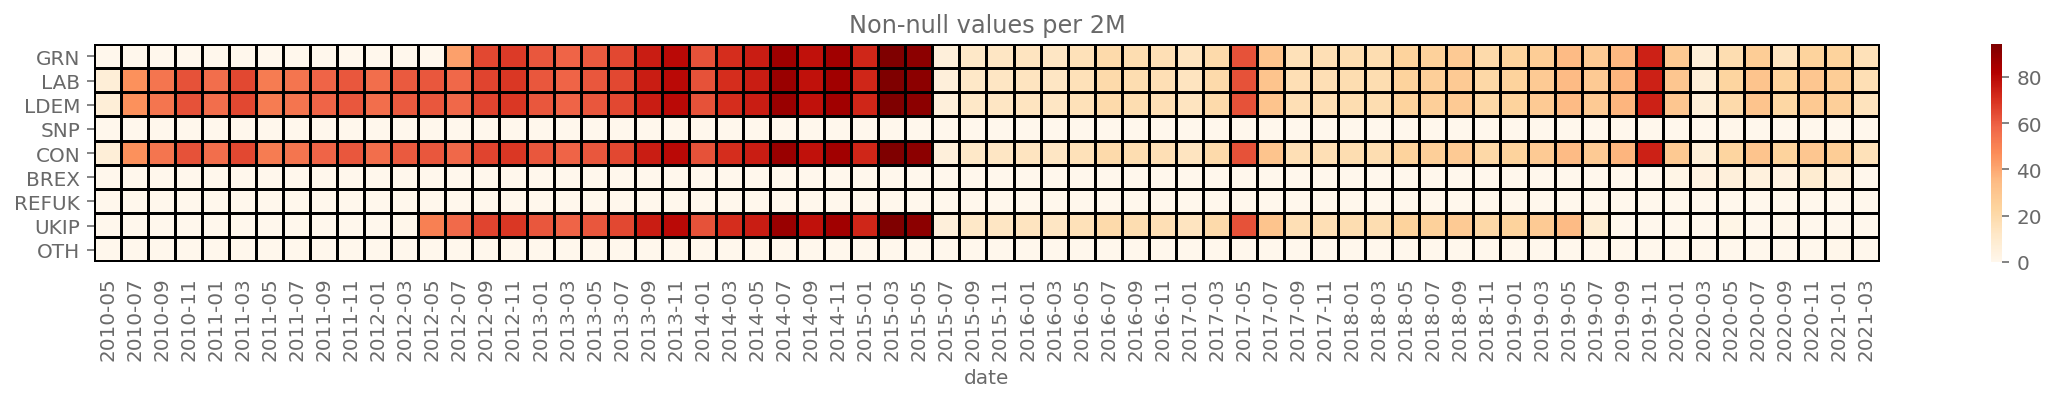

In [12]:
figsize = (20, 2)
freq = "2M"
fig, ax = plt.subplots(1, 1, figsize=figsize)
null_counts = df.resample(freq).agg({col: lambda s: s.notnull().sum() for col in parties})
sns.heatmap(null_counts.to_period(freq).T, cmap="OrRd", linewidths=1, linecolor="black", ax=ax)
ax.set_title(f"Non-null values per {freq}")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

In [13]:
plt.style.use("fivethirtyeight")

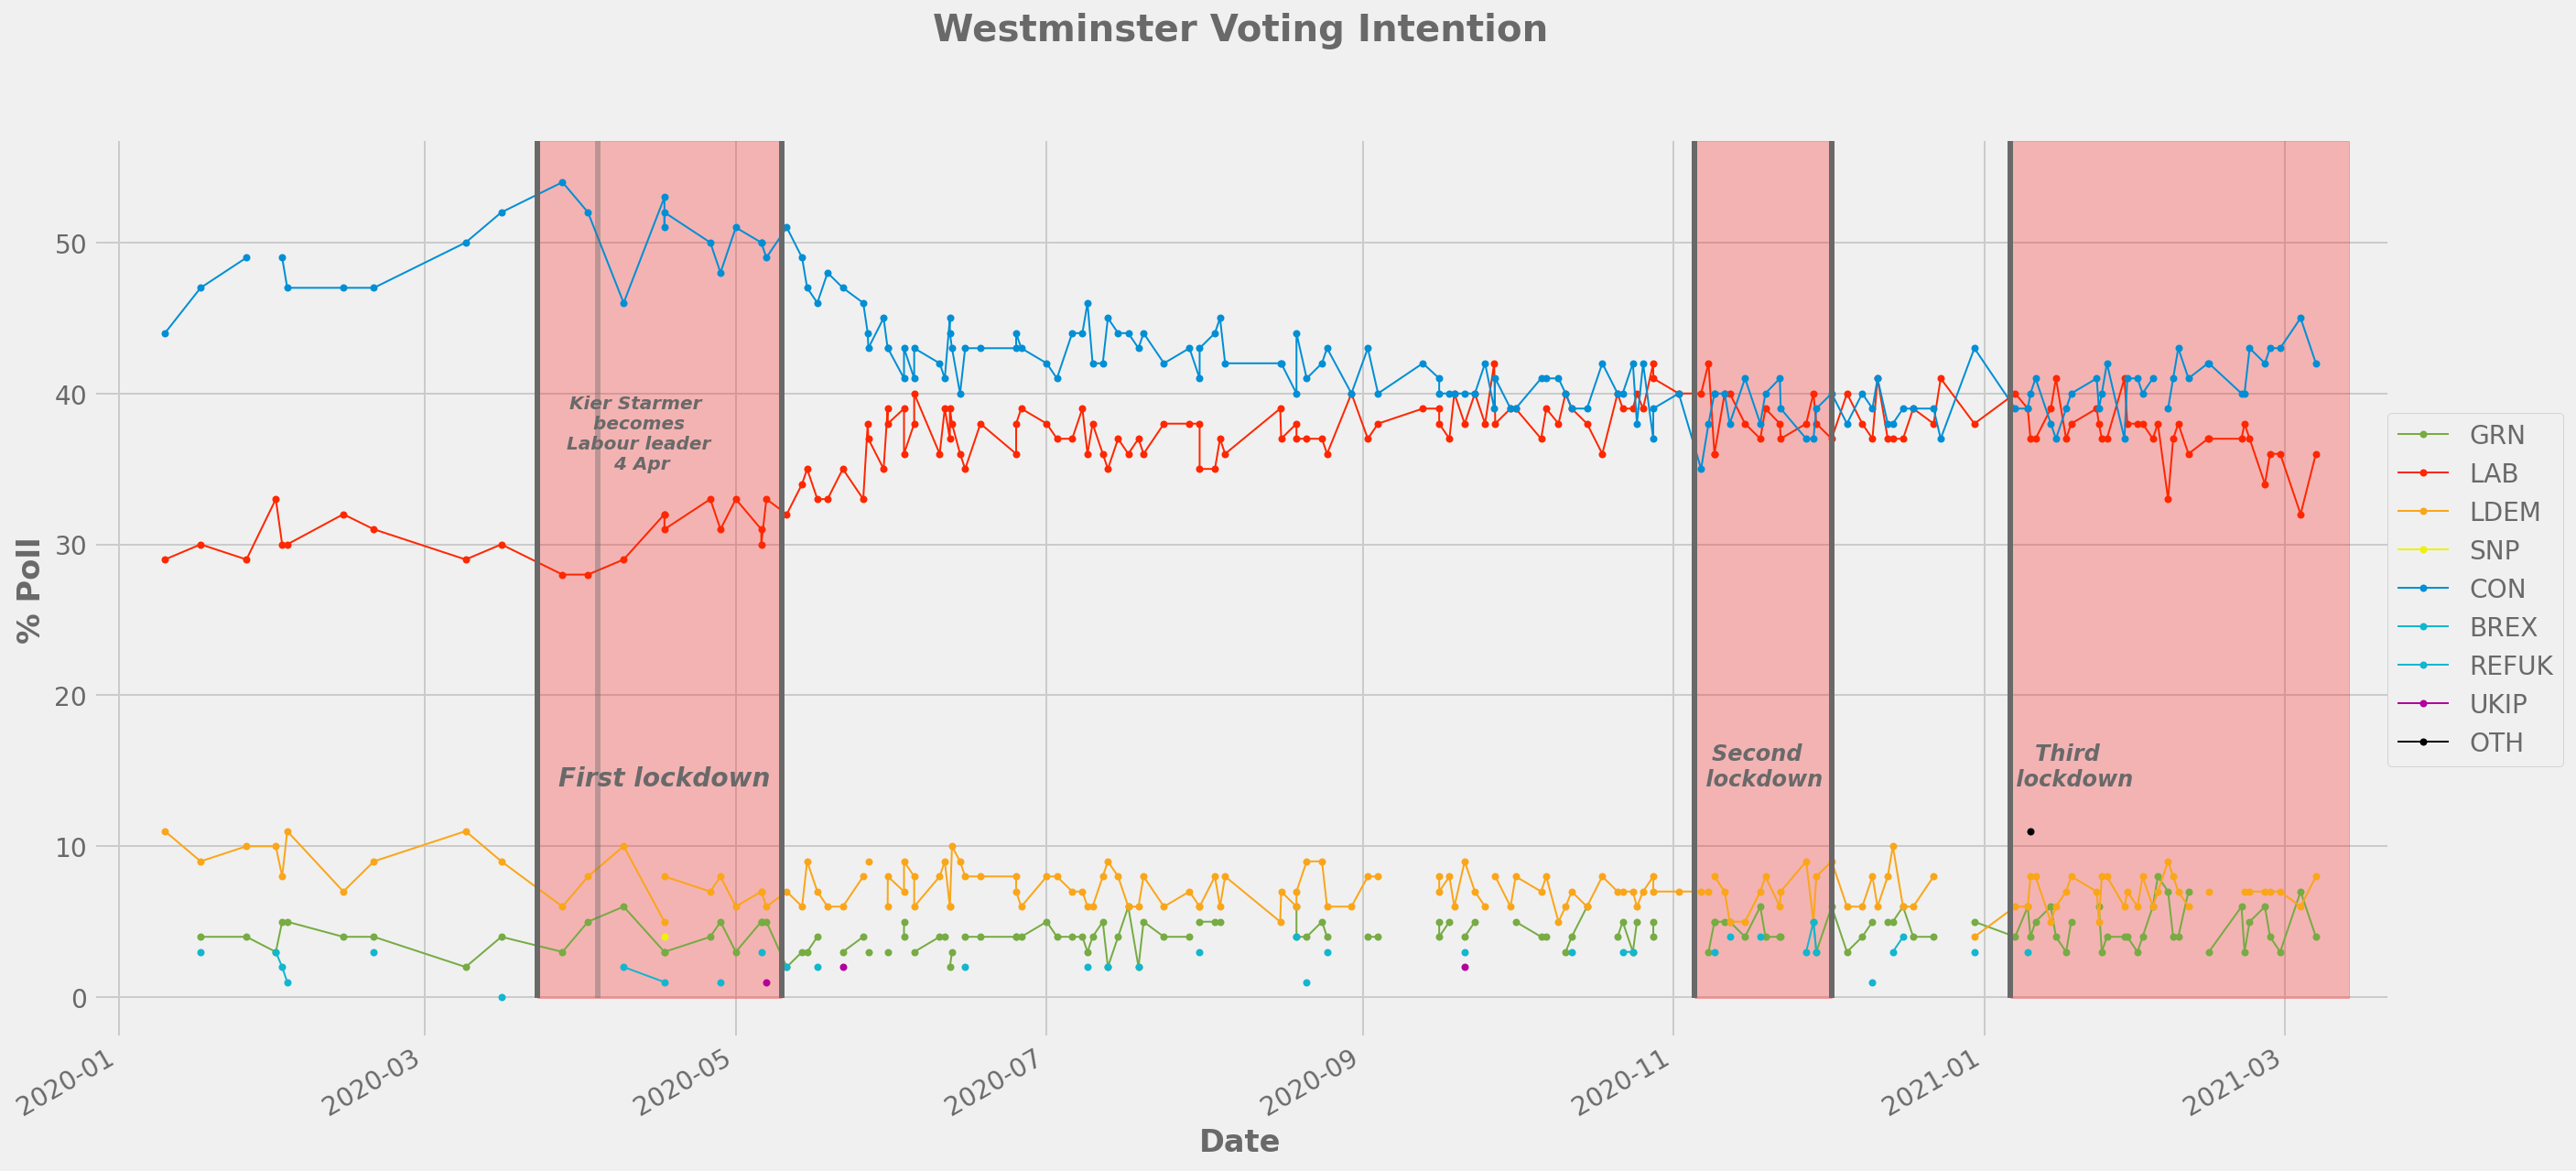

In [14]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], add_lockdown_context=True);

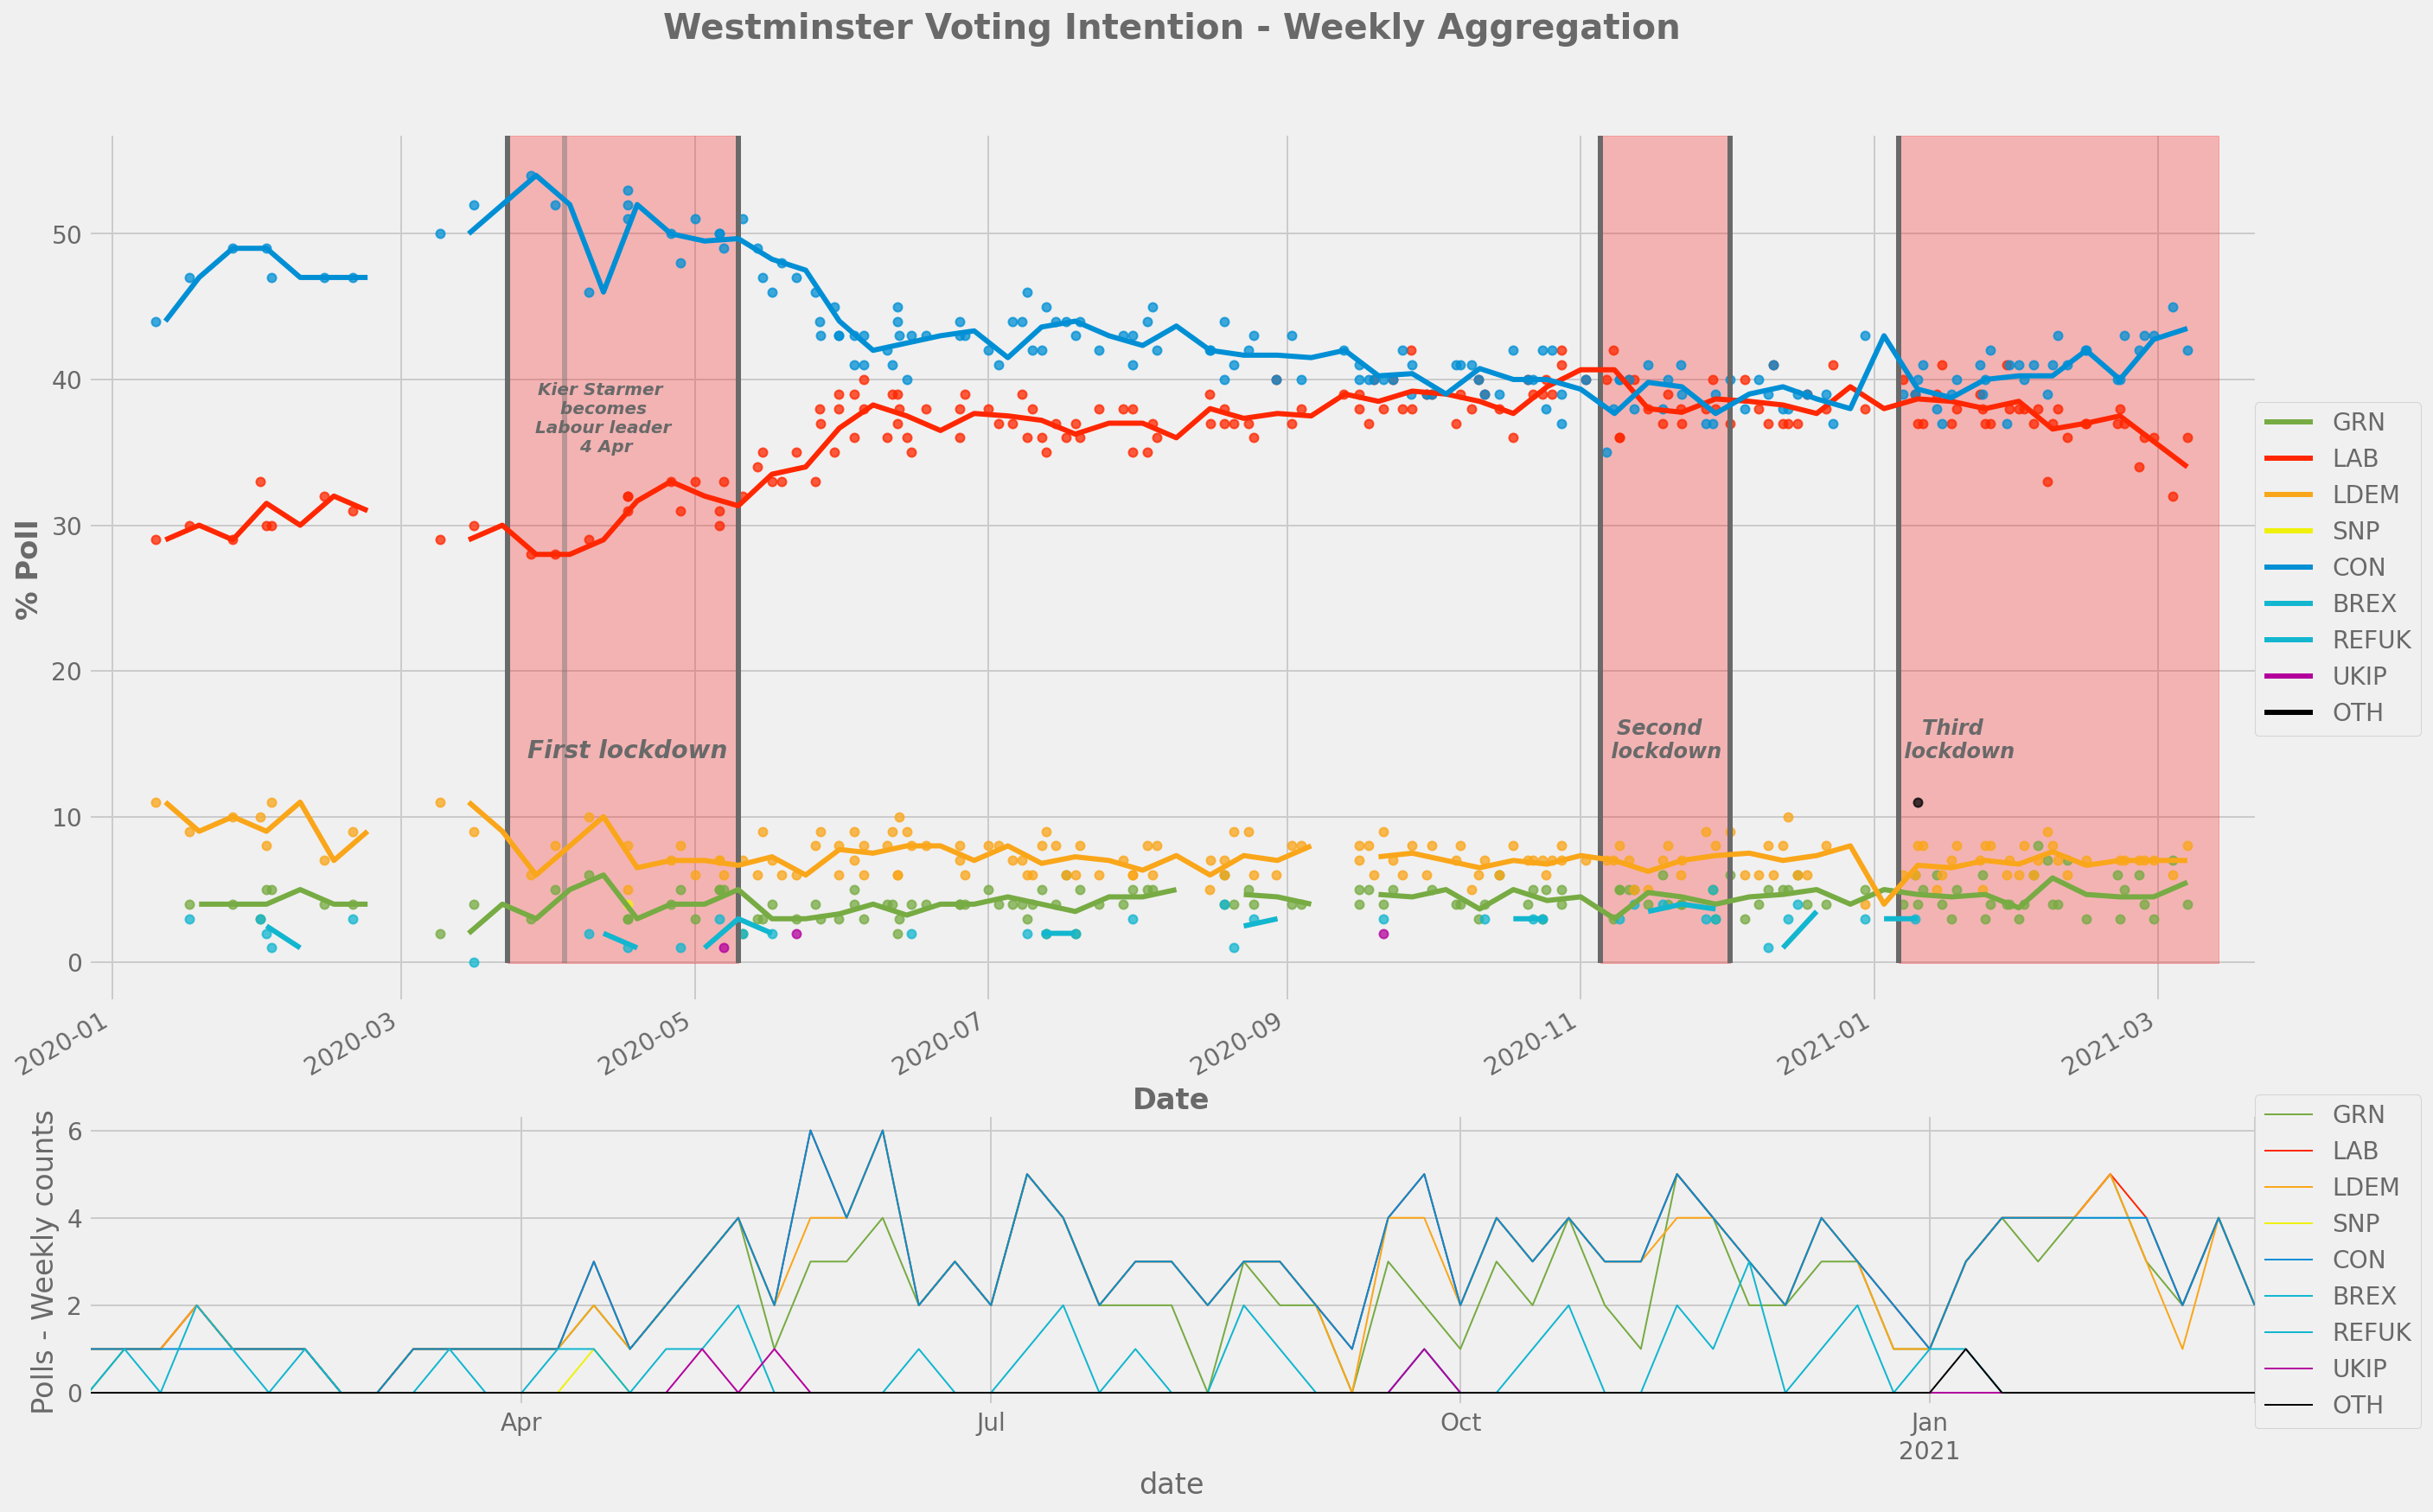

In [15]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], agg="W", add_lockdown_context=True, markersize=5);

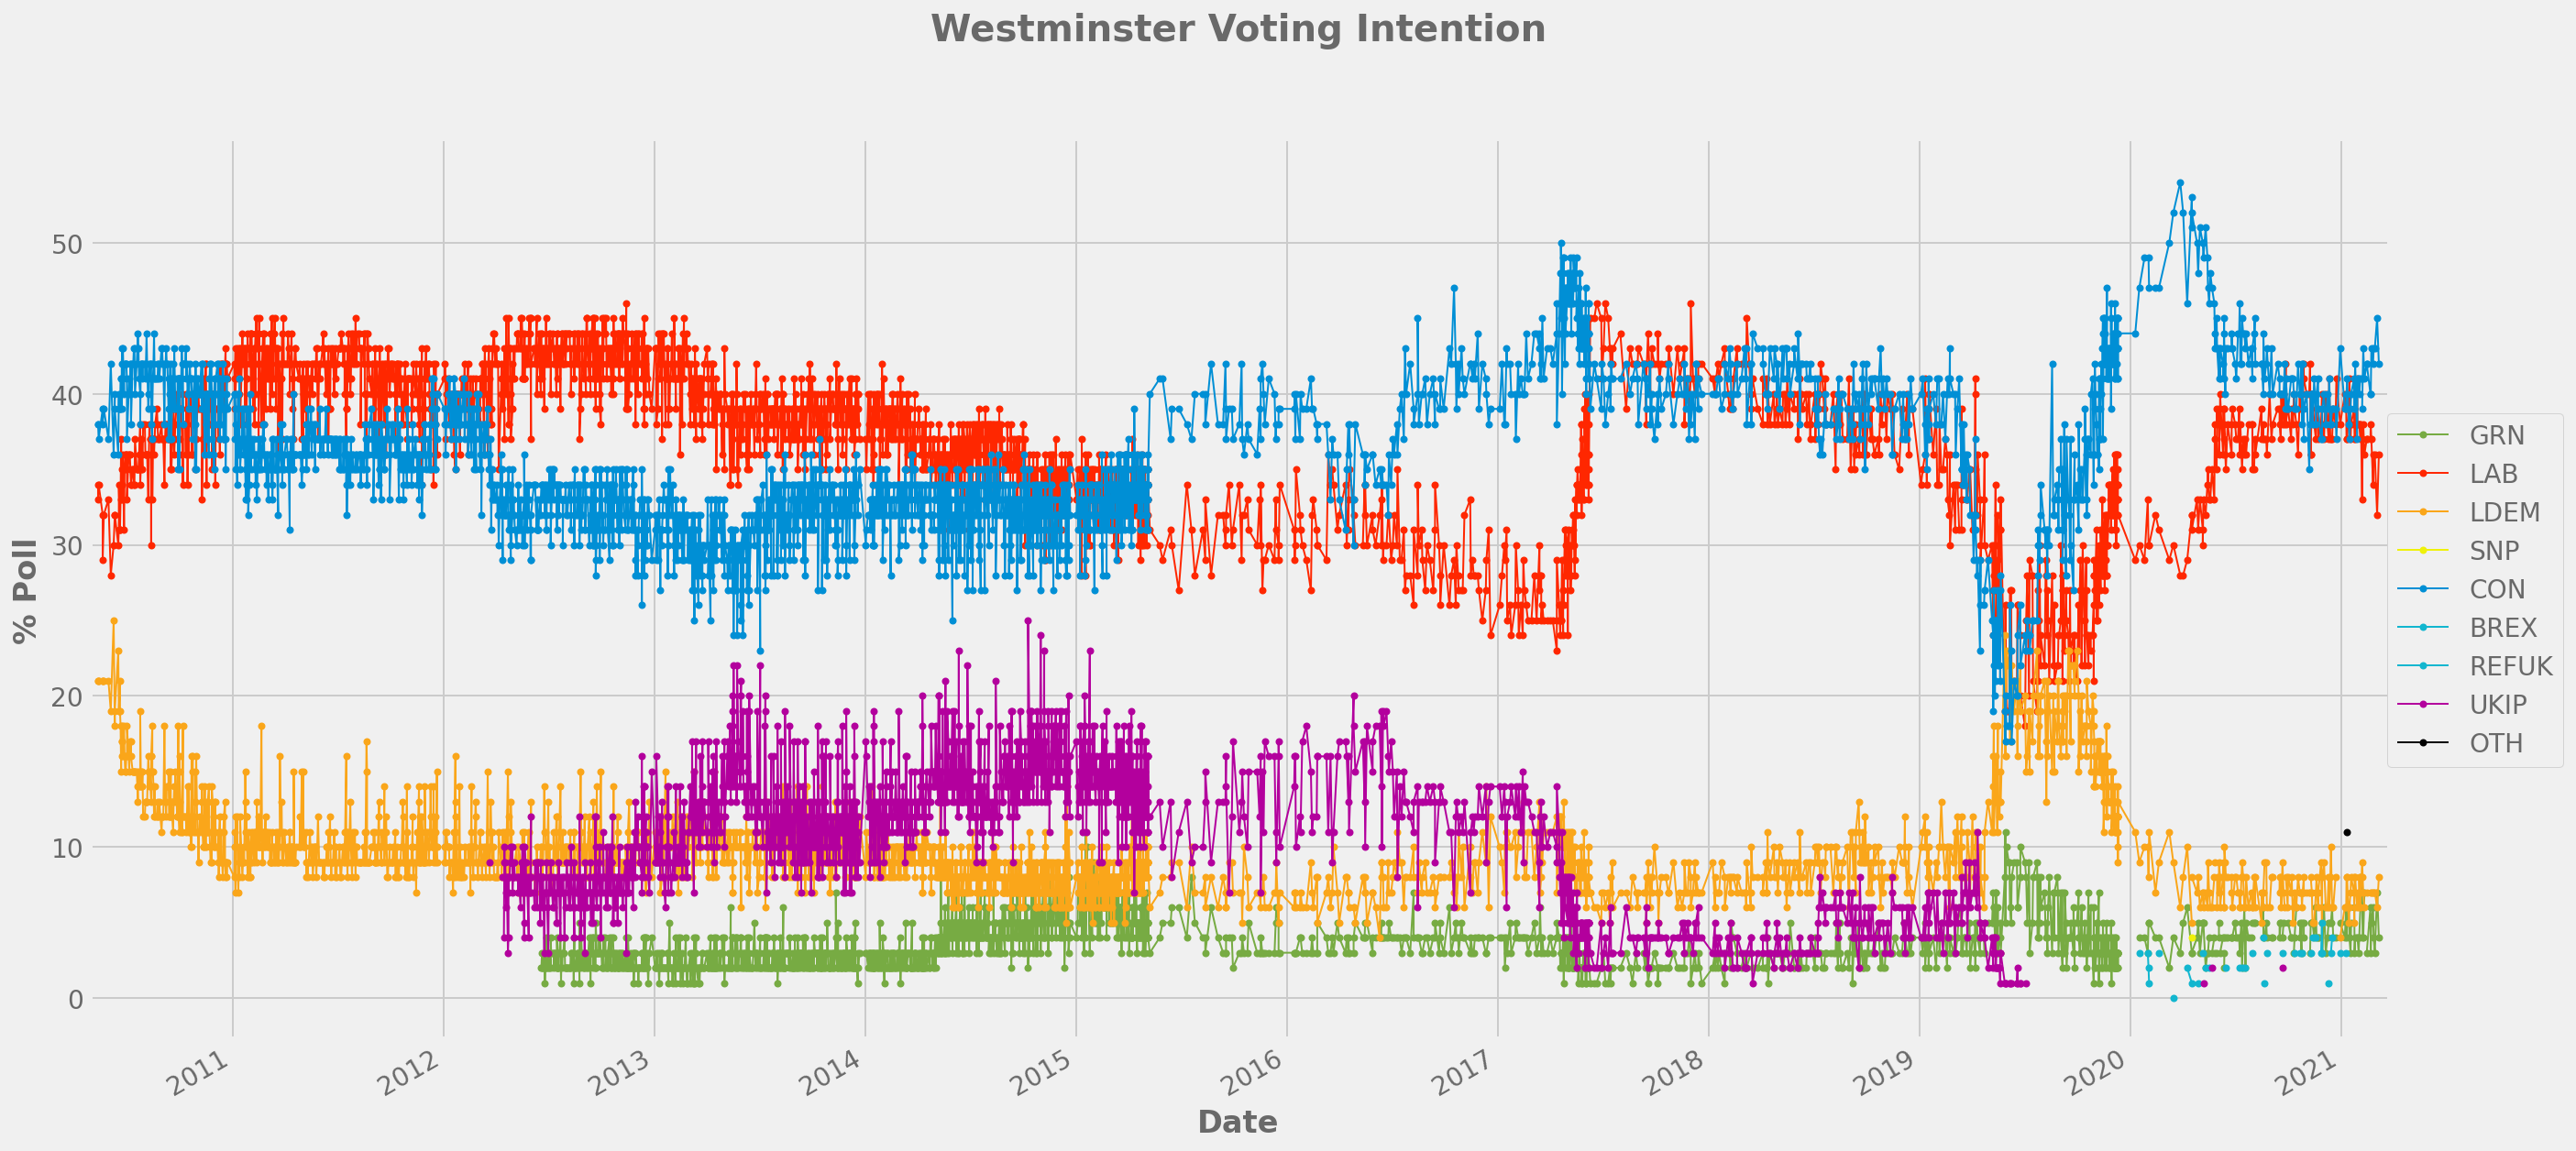

In [16]:
plot_vote_intention(df);

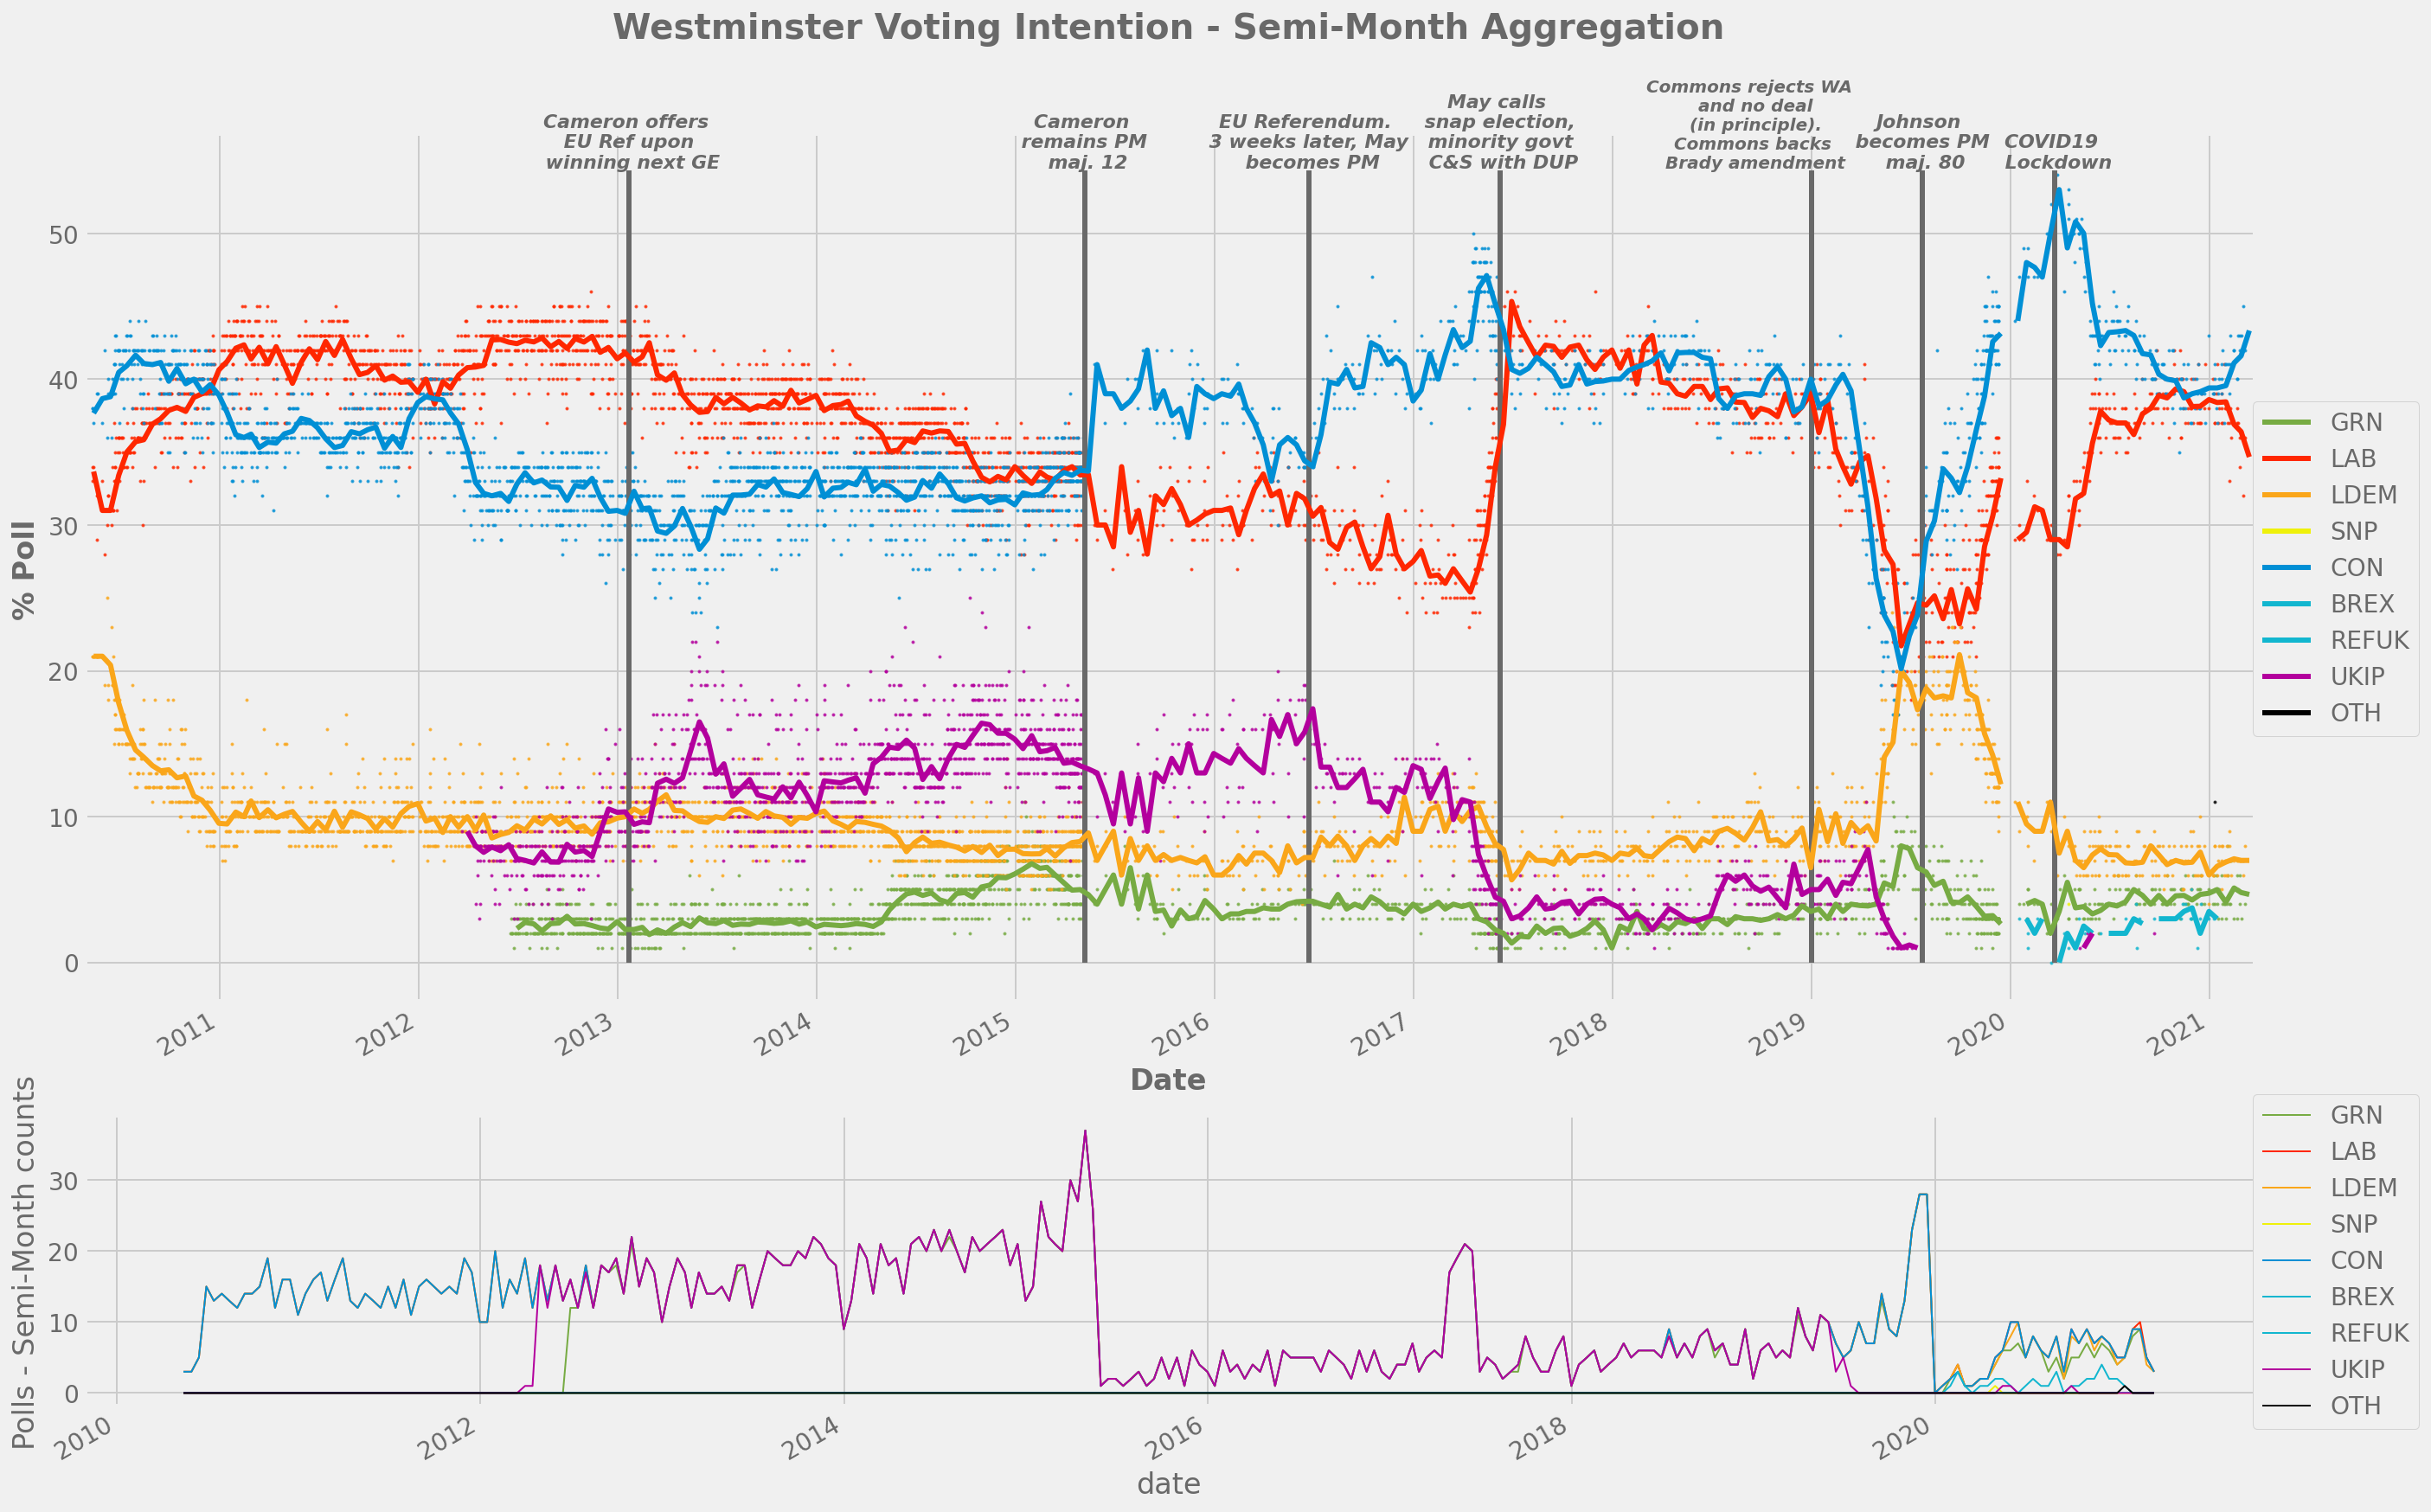

In [17]:
plot_vote_intention(df, agg='SM', add_lifetime_context=True);

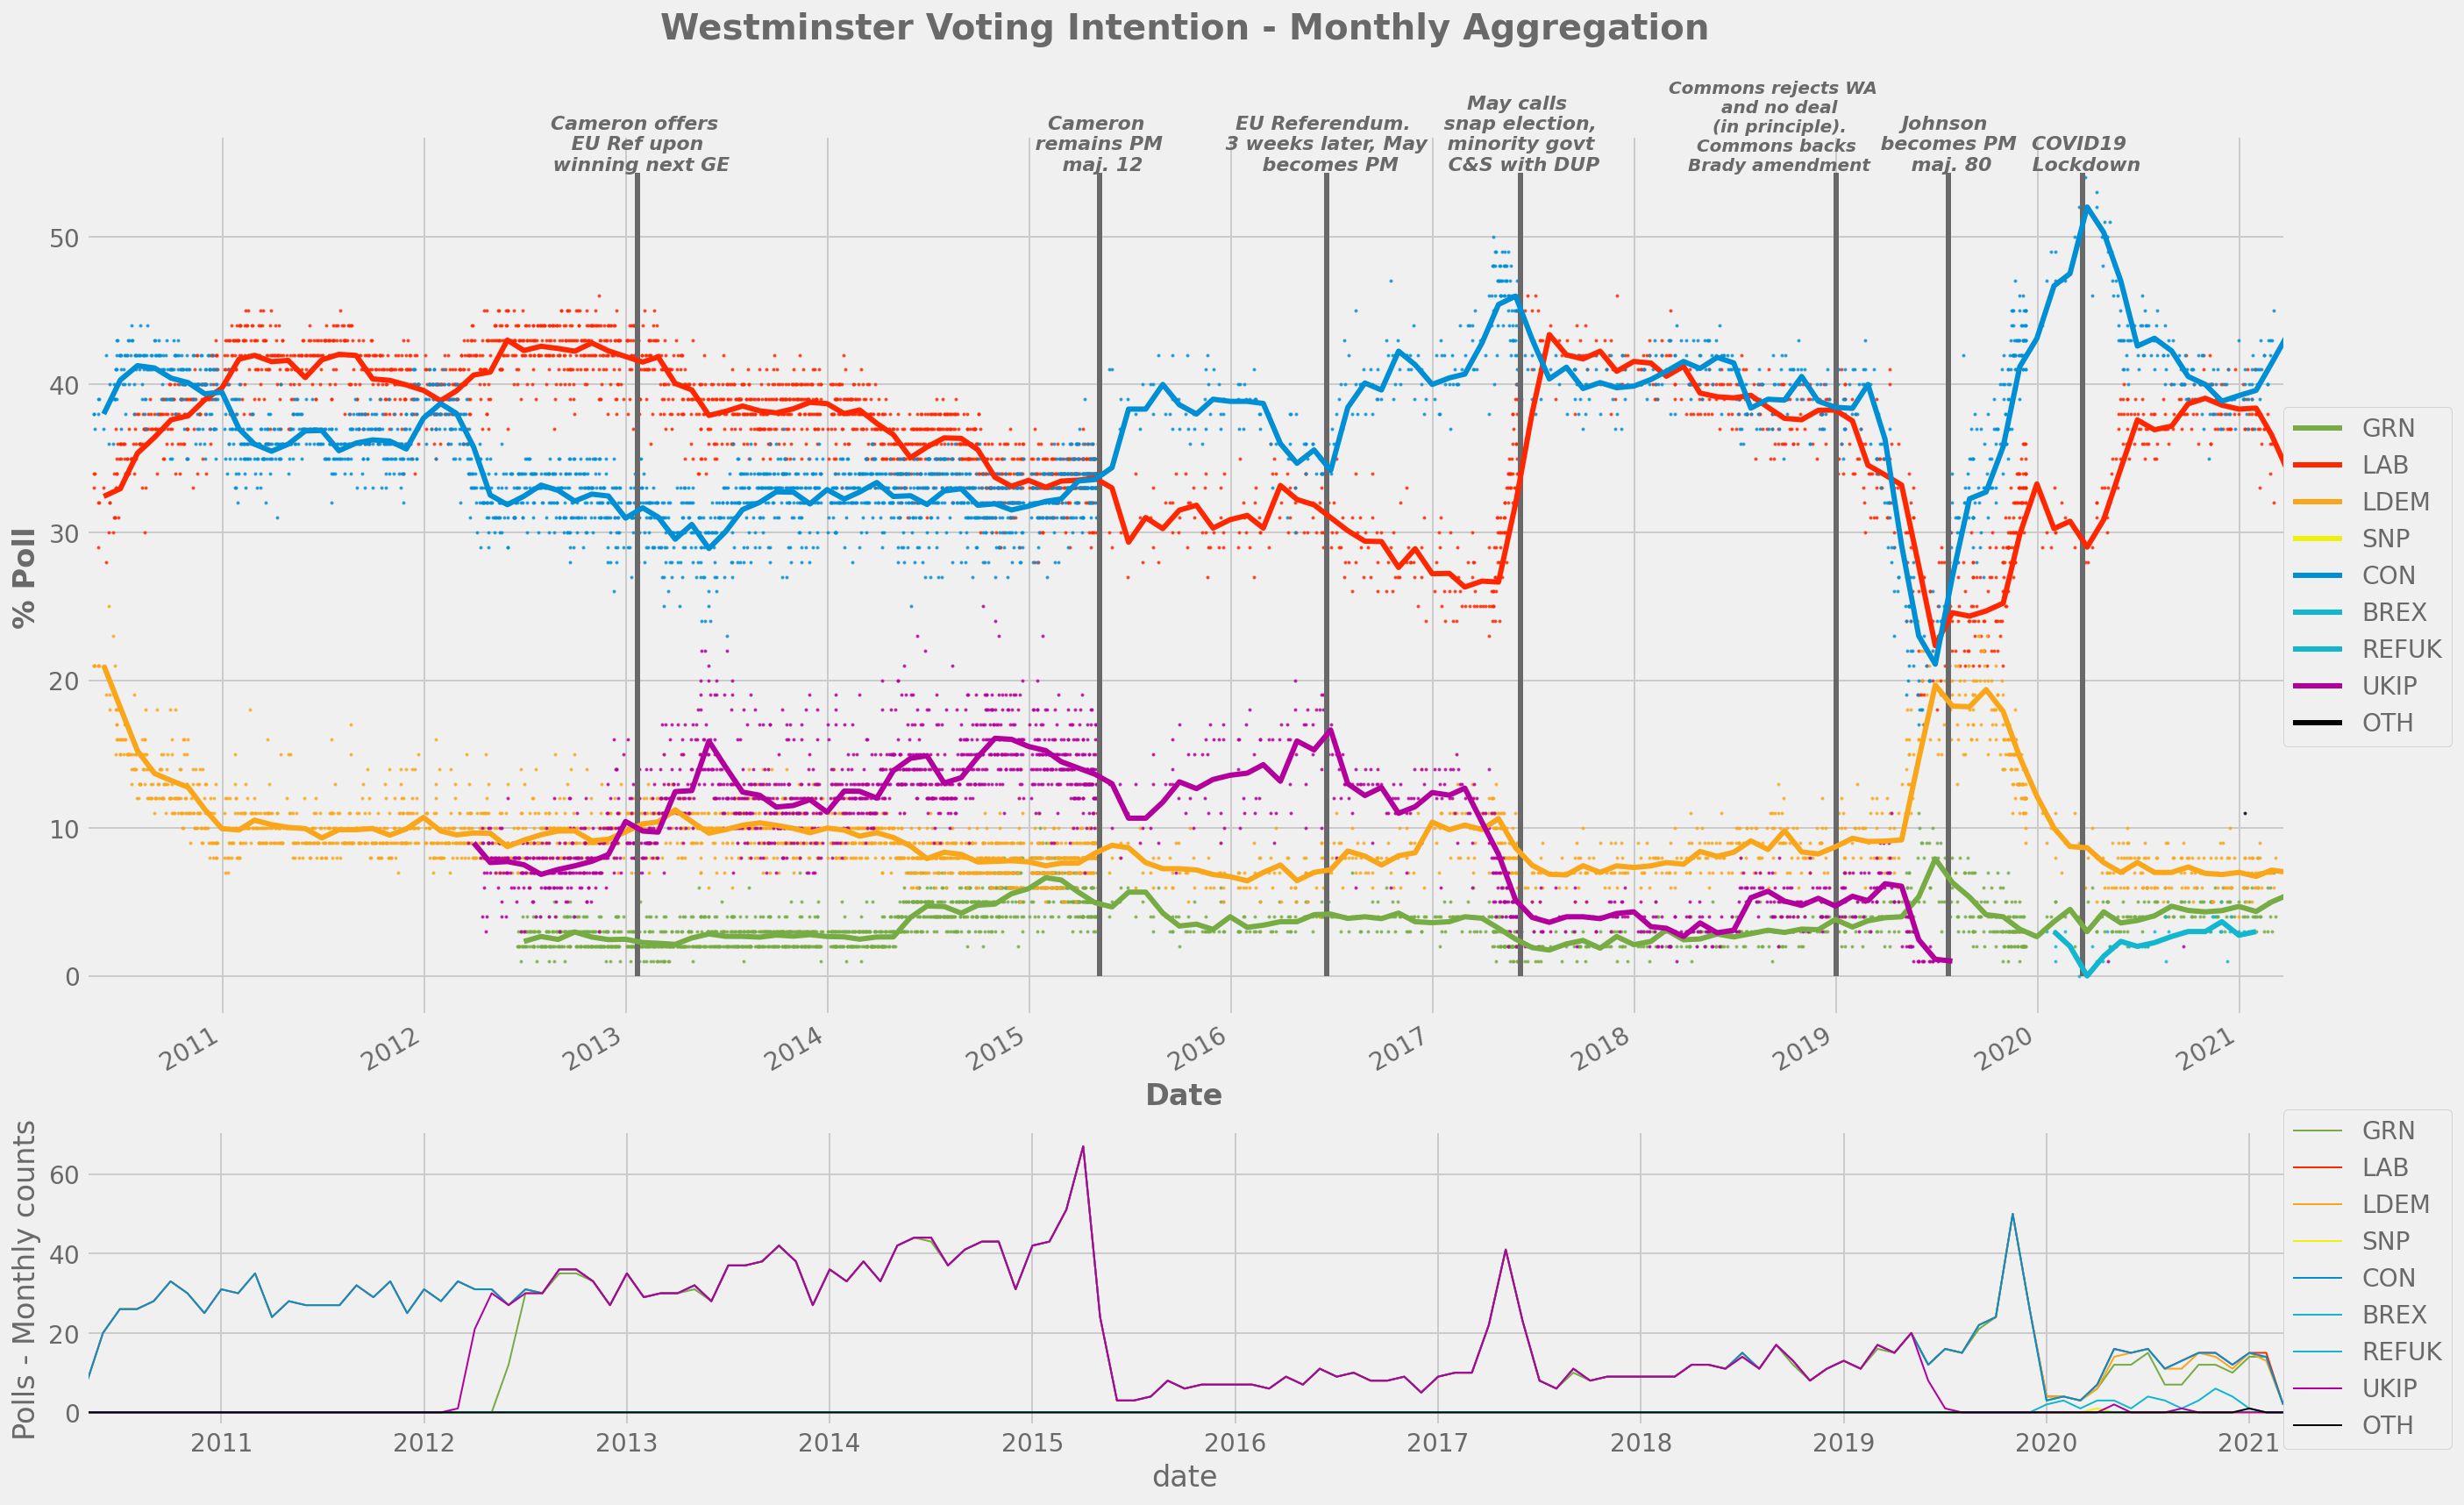

In [18]:
plot_vote_intention(df, agg='M', add_lifetime_context=True);

In [19]:
df[list(parties)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2853 entries, 2010-05-13 00:00:00 to 2021-03-07 00:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRN     2101 non-null   float64
 1   LAB     2853 non-null   int64  
 2   LDEM    2844 non-null   float64
 3   SNP     1 non-null      float64
 4   CON     2851 non-null   float64
 5   BREX    35 non-null     float64
 6   REFUK   0 non-null      float64
 7   UKIP    1890 non-null   float64
 8   OTH     1 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 222.9 KB


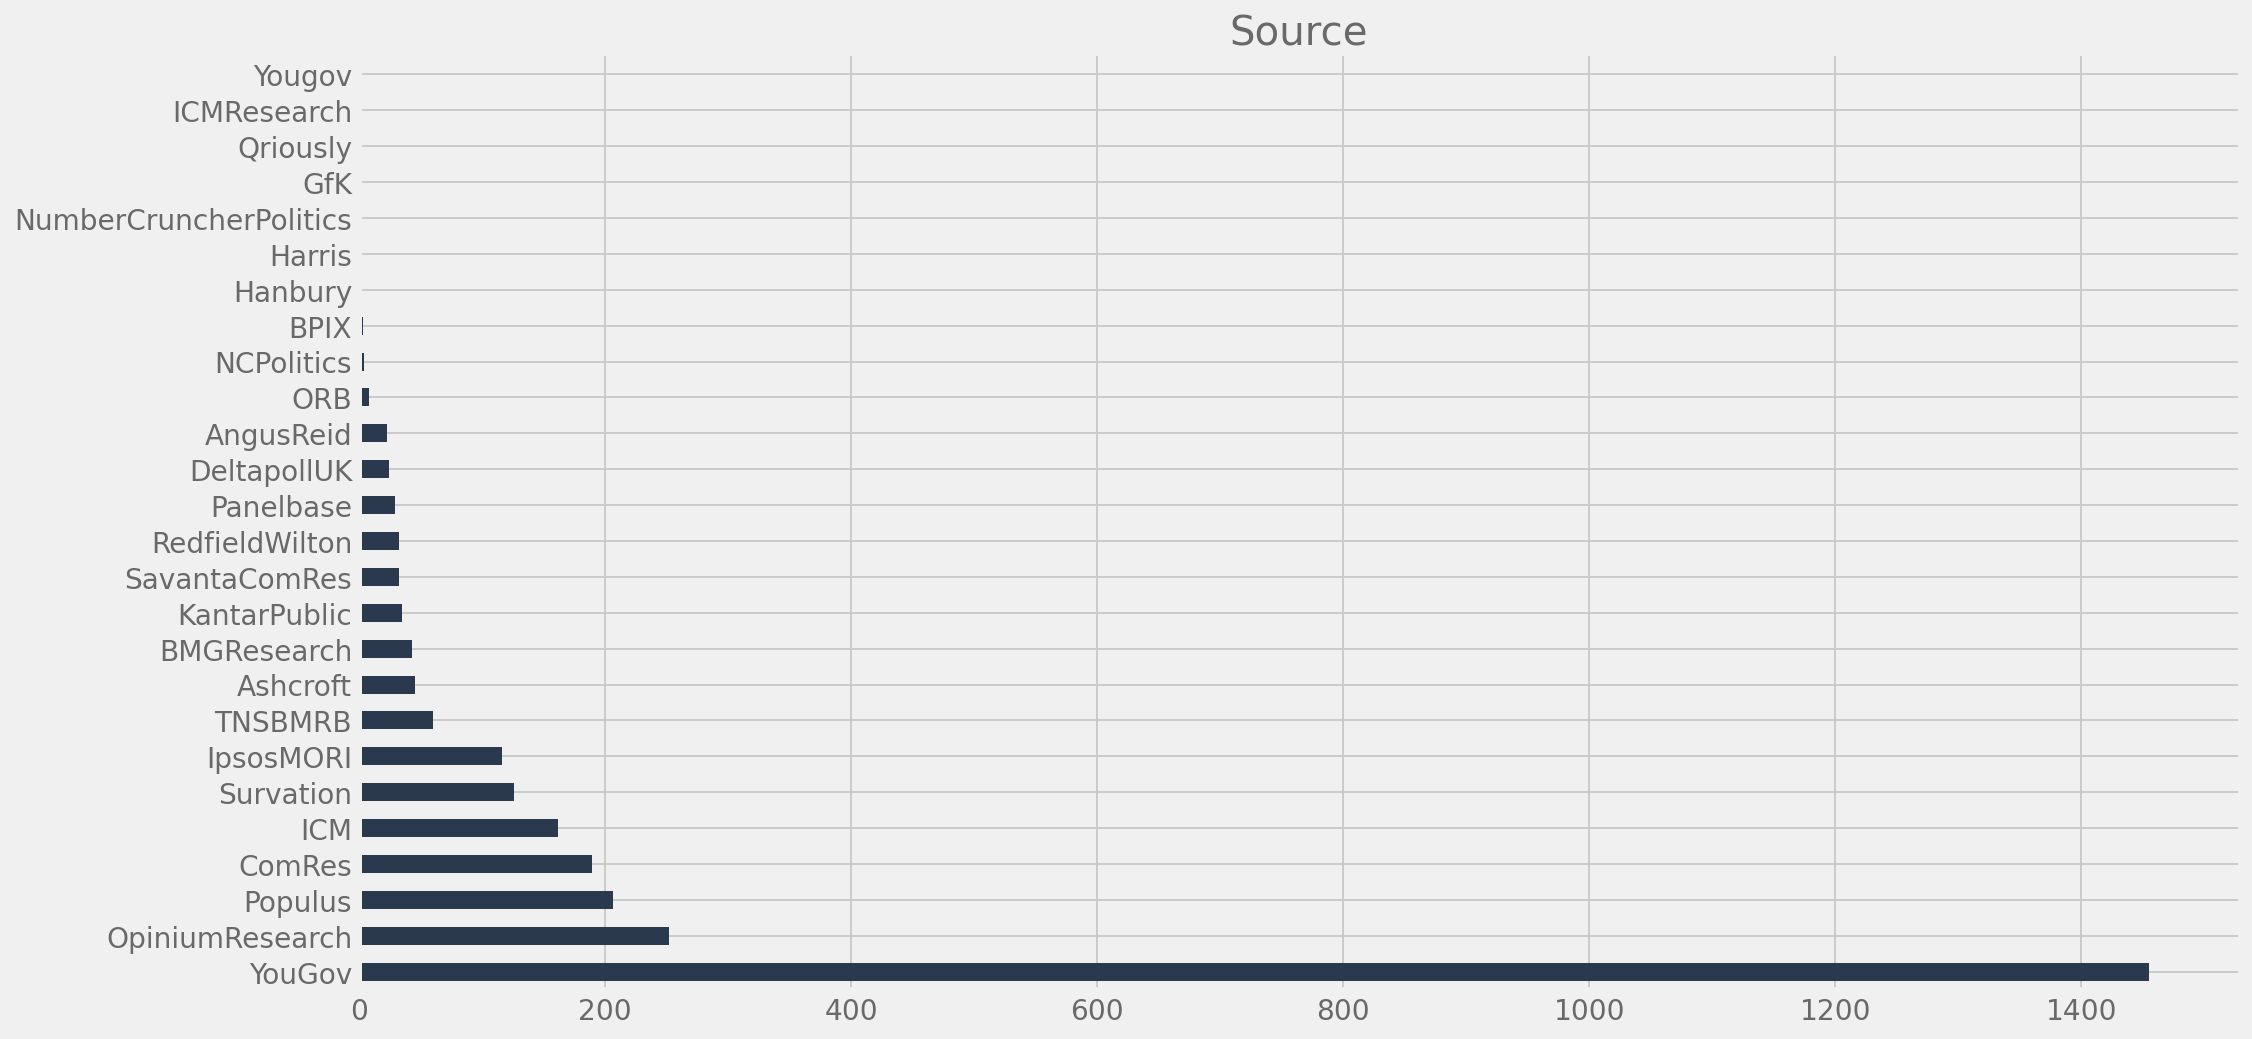

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df["source"].value_counts().plot(kind='barh', ax=ax, color="#2b394f")
ax.set_title("Source");

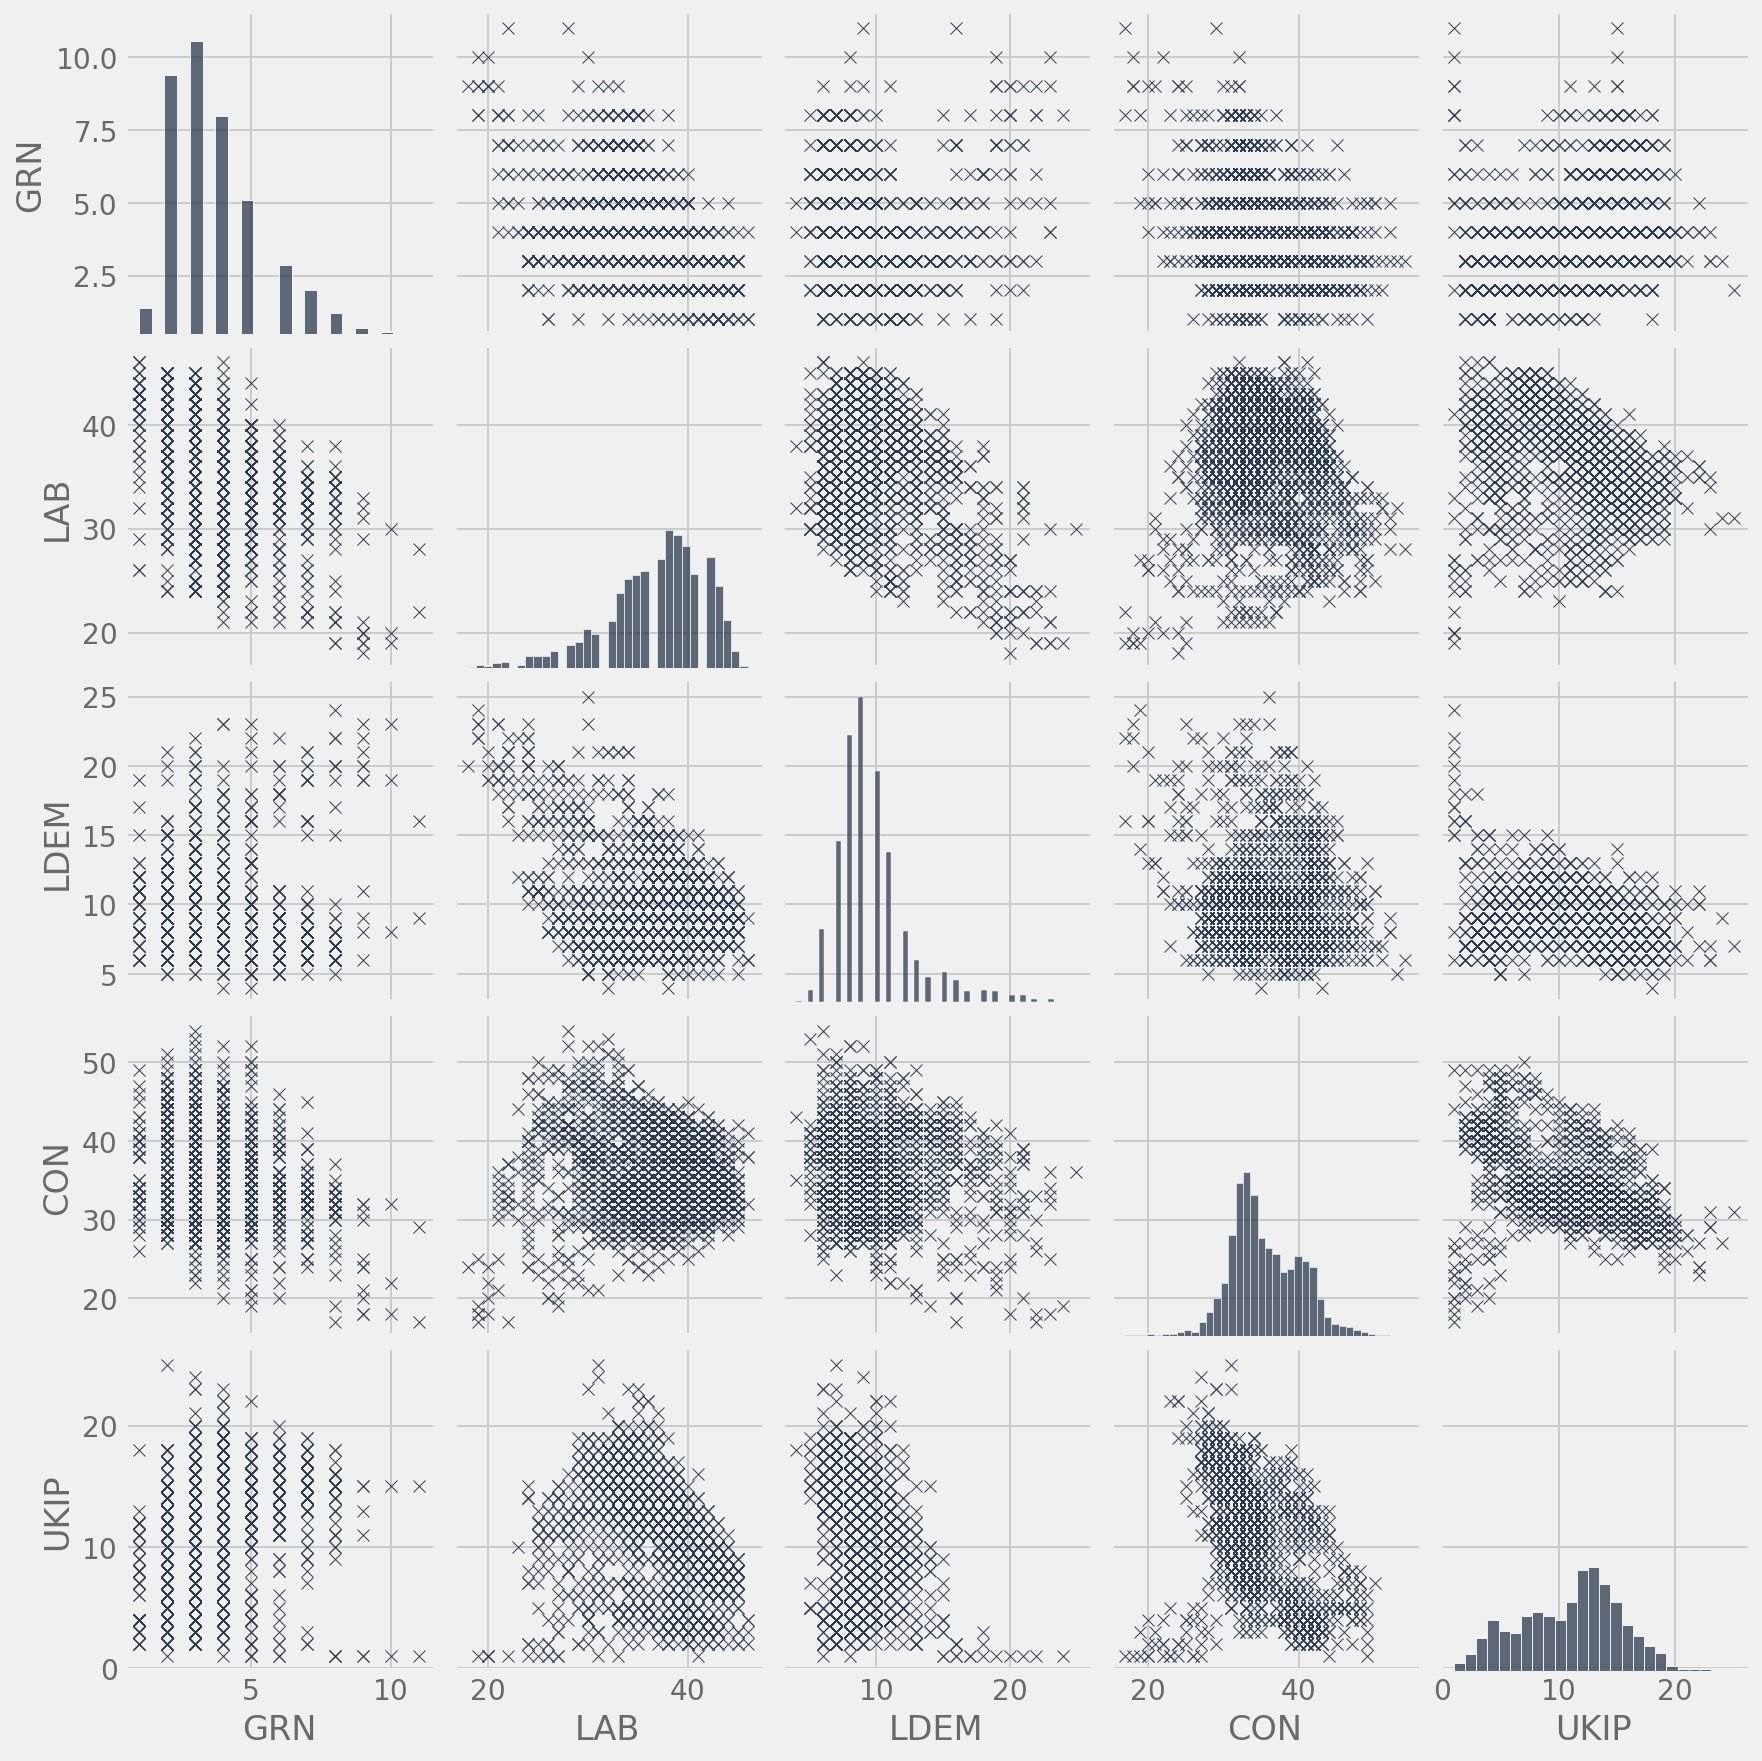

In [21]:
sns.pairplot(df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']], markers="x",
             diag_kws={"color": "#2b394f"},
             plot_kws={"color": "#2b394f"});

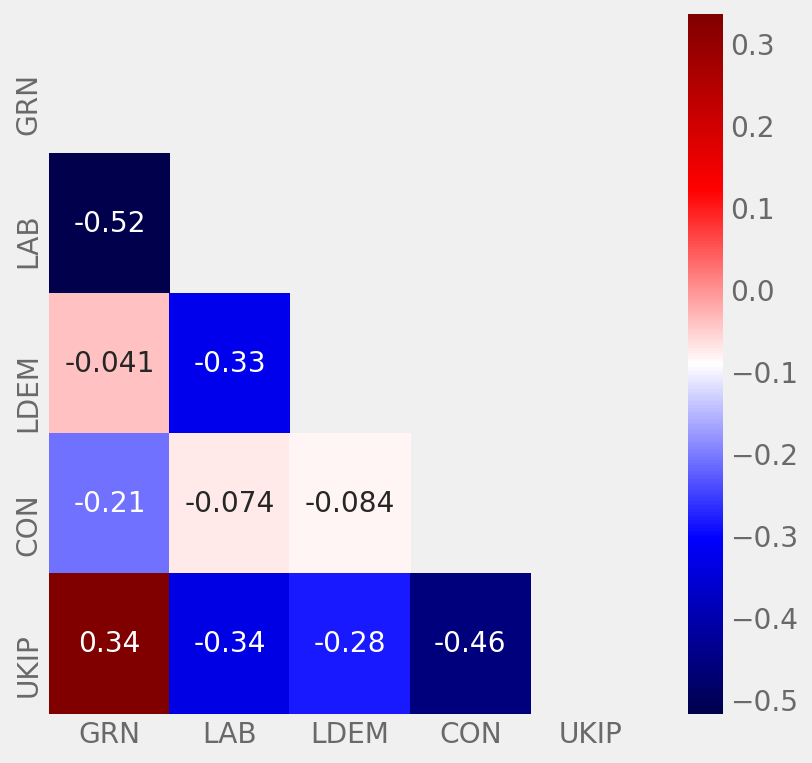

In [22]:
corr = df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='seismic', mask=mask);

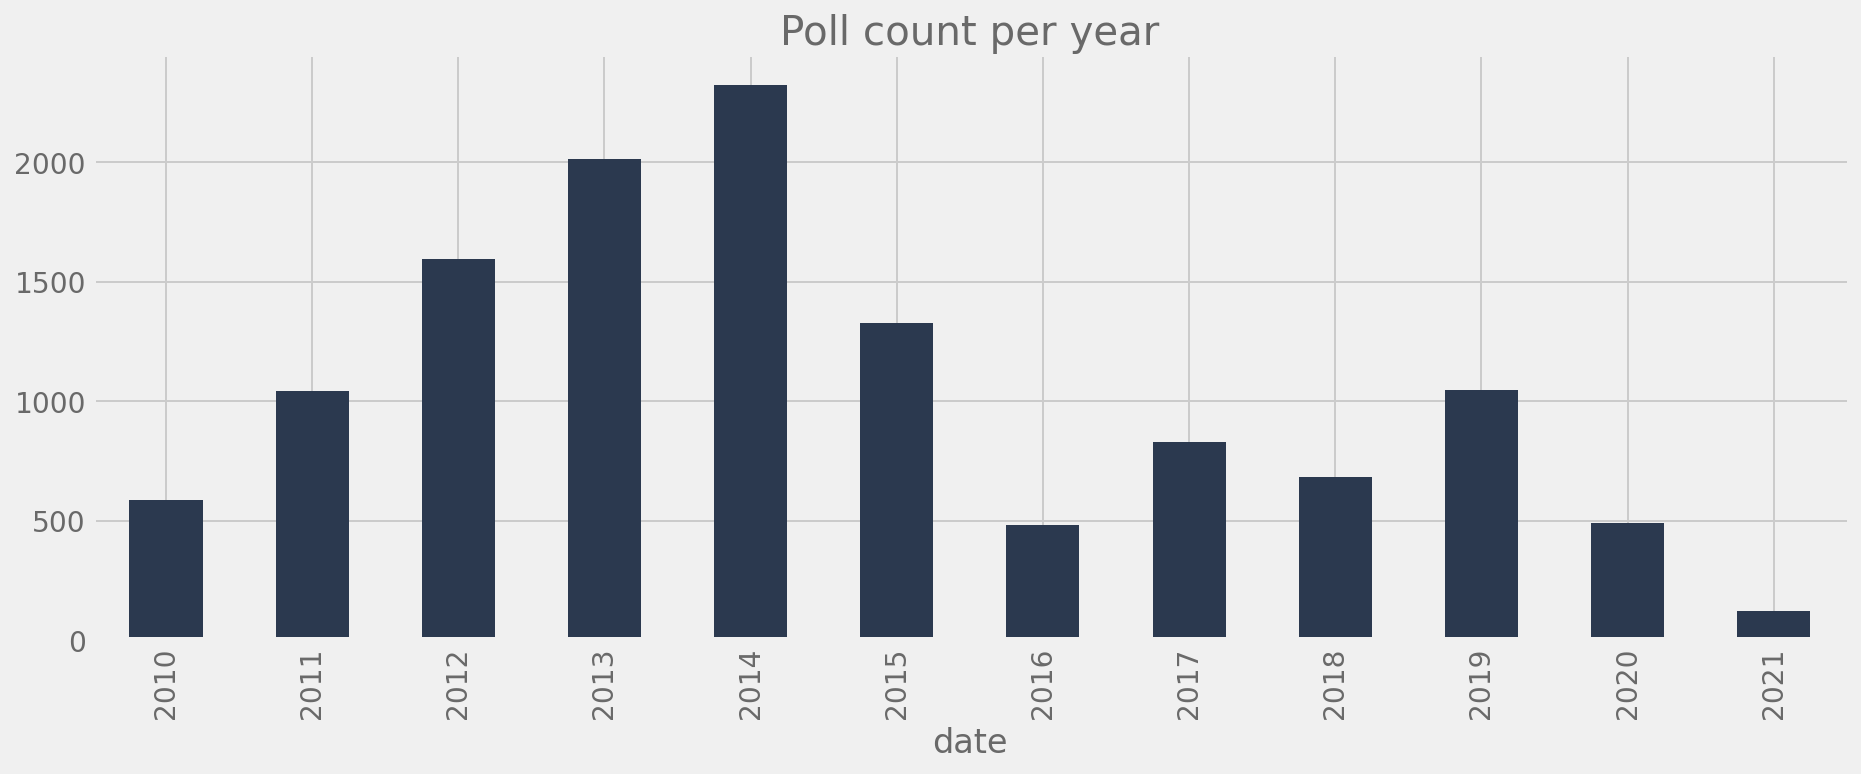

In [23]:
df.groupby(df.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count().sum(axis='columns').plot.bar(figsize=(14, 5), color="#2b394f")
plt.title("Poll count per year");

In [24]:
df_w = df.resample("W").mean()

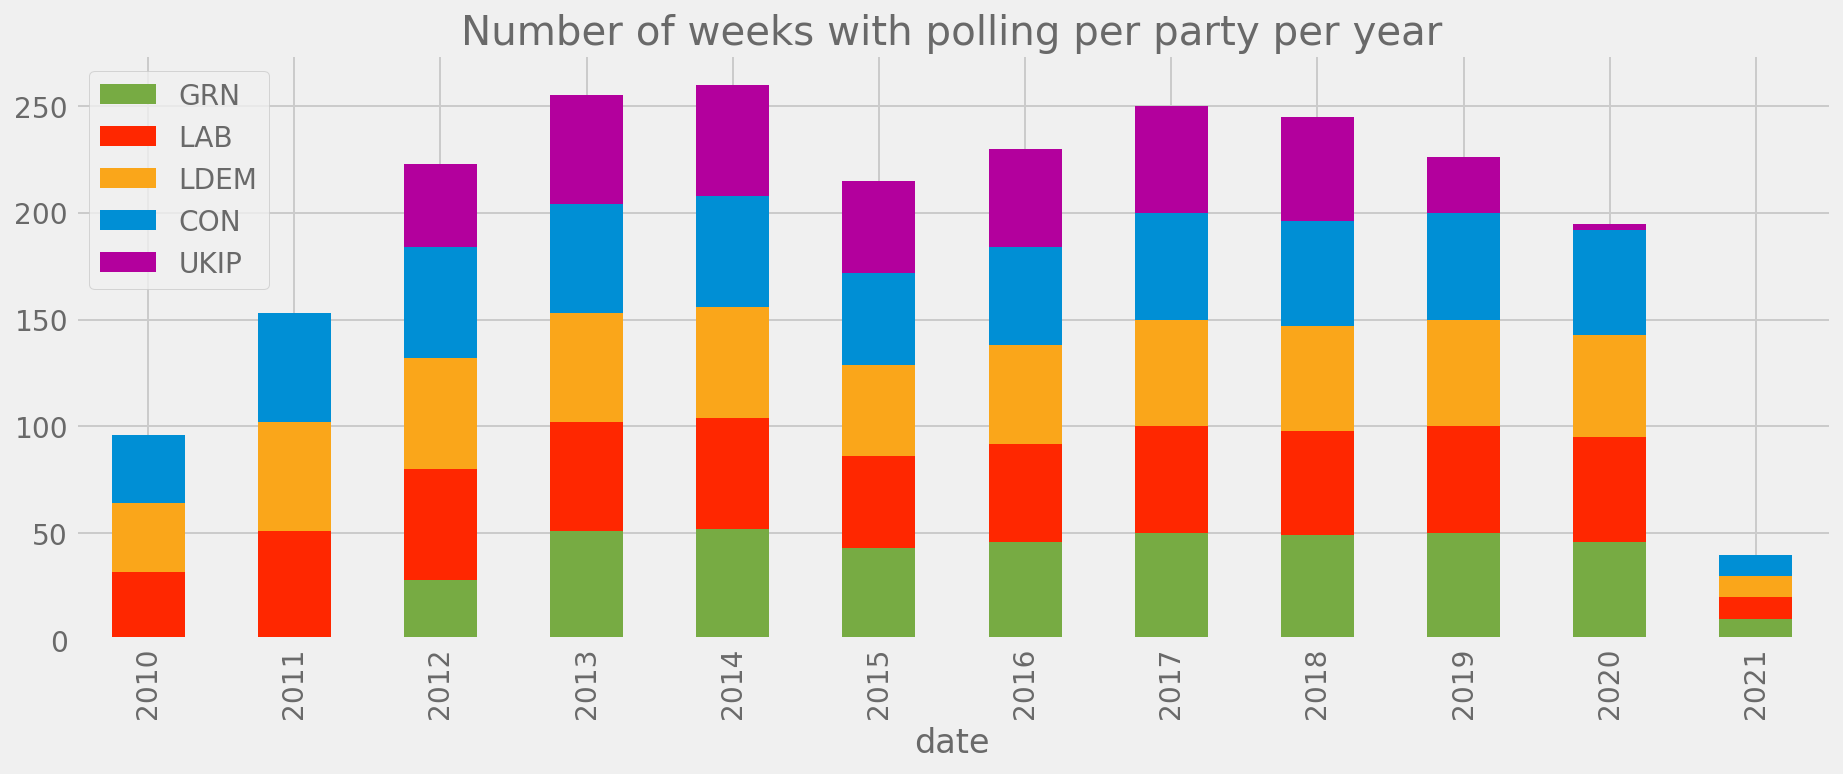

In [25]:
(df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()
 .plot.bar(stacked=True,
           figsize=(14, 5),
           color=["#77AB43", "#FF2700", "#FAA61A", "#008FD5", "#B3009D"]))
plt.title("Number of weeks with polling per party per year");

In [26]:
df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()

GRN  LAB  LDEM  CON  UKIP
date                           
2010    0   32    32   32     0
2011    0   51    51   51     0
2012   28   52    52   52    39
2013   51   51    51   51    51
2014   52   52    52   52    52
2015   43   43    43   43    43
2016   46   46    46   46    46
2017   50   50    50   50    50
2018   49   49    49   49    49
2019   50   50    50   50    26
2020   46   49    48   49     3
2021   10   10    10   10     0

In [27]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2015 <= year <= 2017'),
             hue='year', vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1});

Error in callback <function flush_figures at 0x7efc420beef0> (for post_execute):


KeyboardInterrupt: 

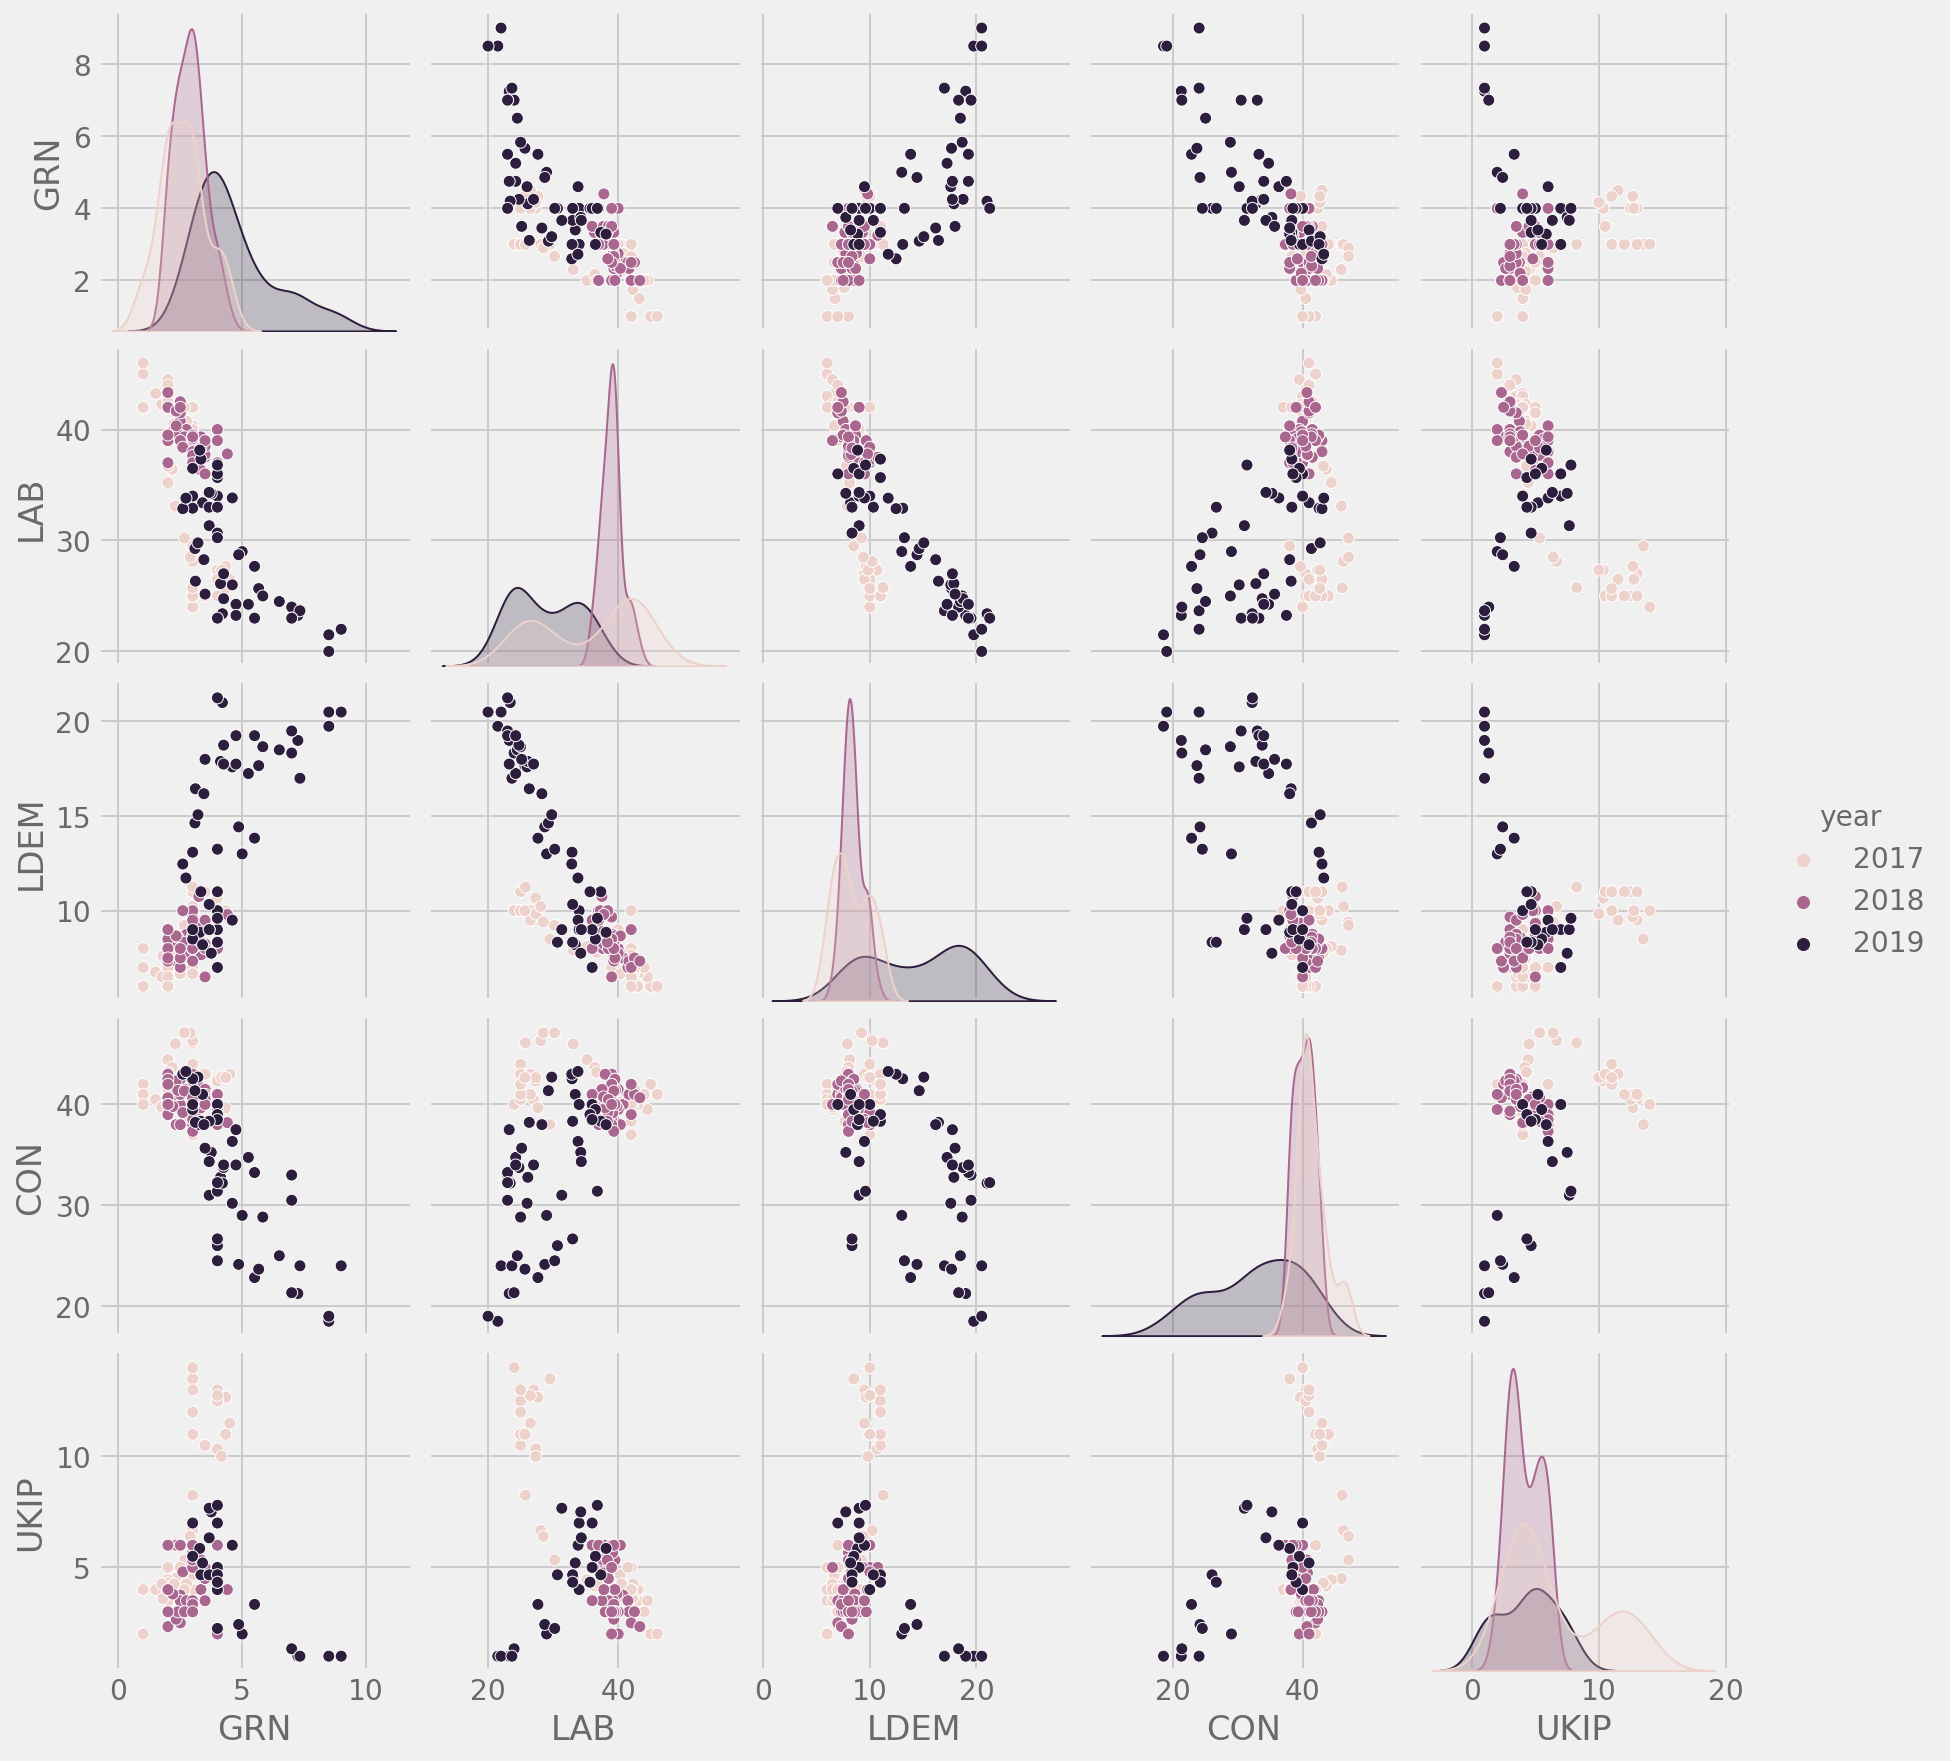

In [28]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2017 <= year <= 2019'),
             hue='year', vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1});

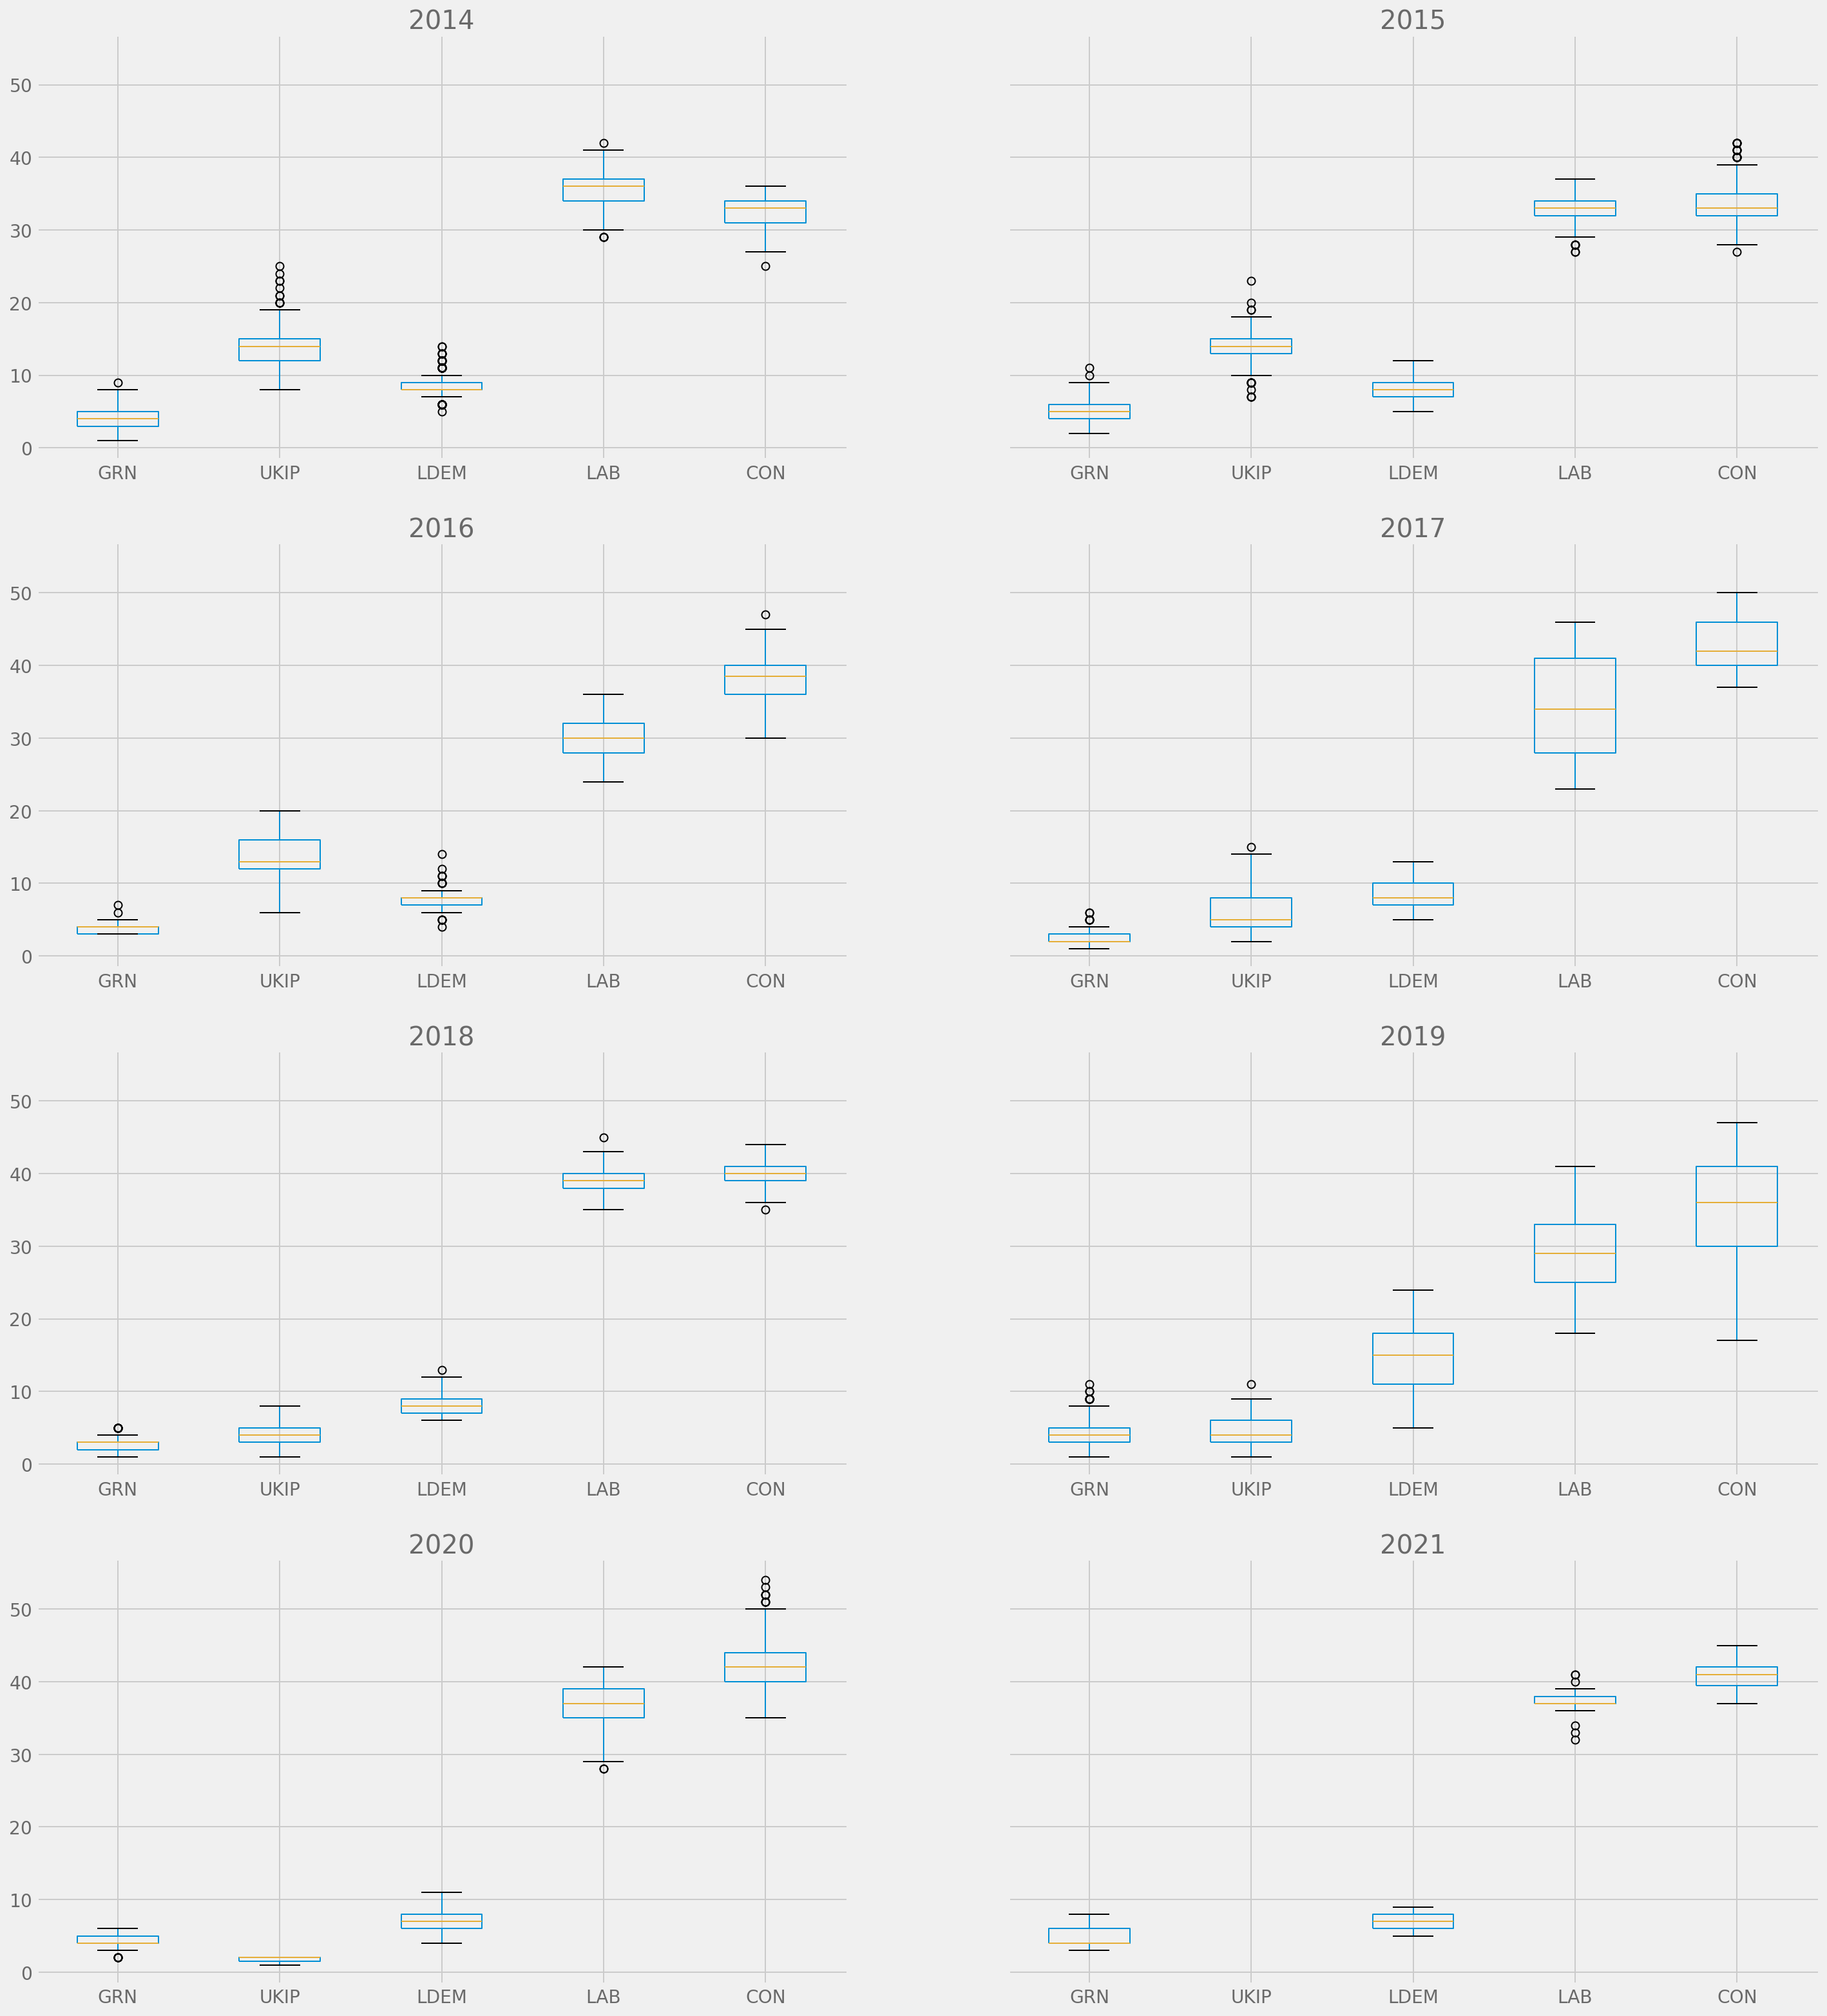

In [30]:
tmp = df[df.index.year >= 2014][["GRN", "UKIP", "LDEM", "LAB", "CON"]]
tmp.groupby(tmp.index.year).boxplot(figsize=(24, 28), layout=(4, 2));

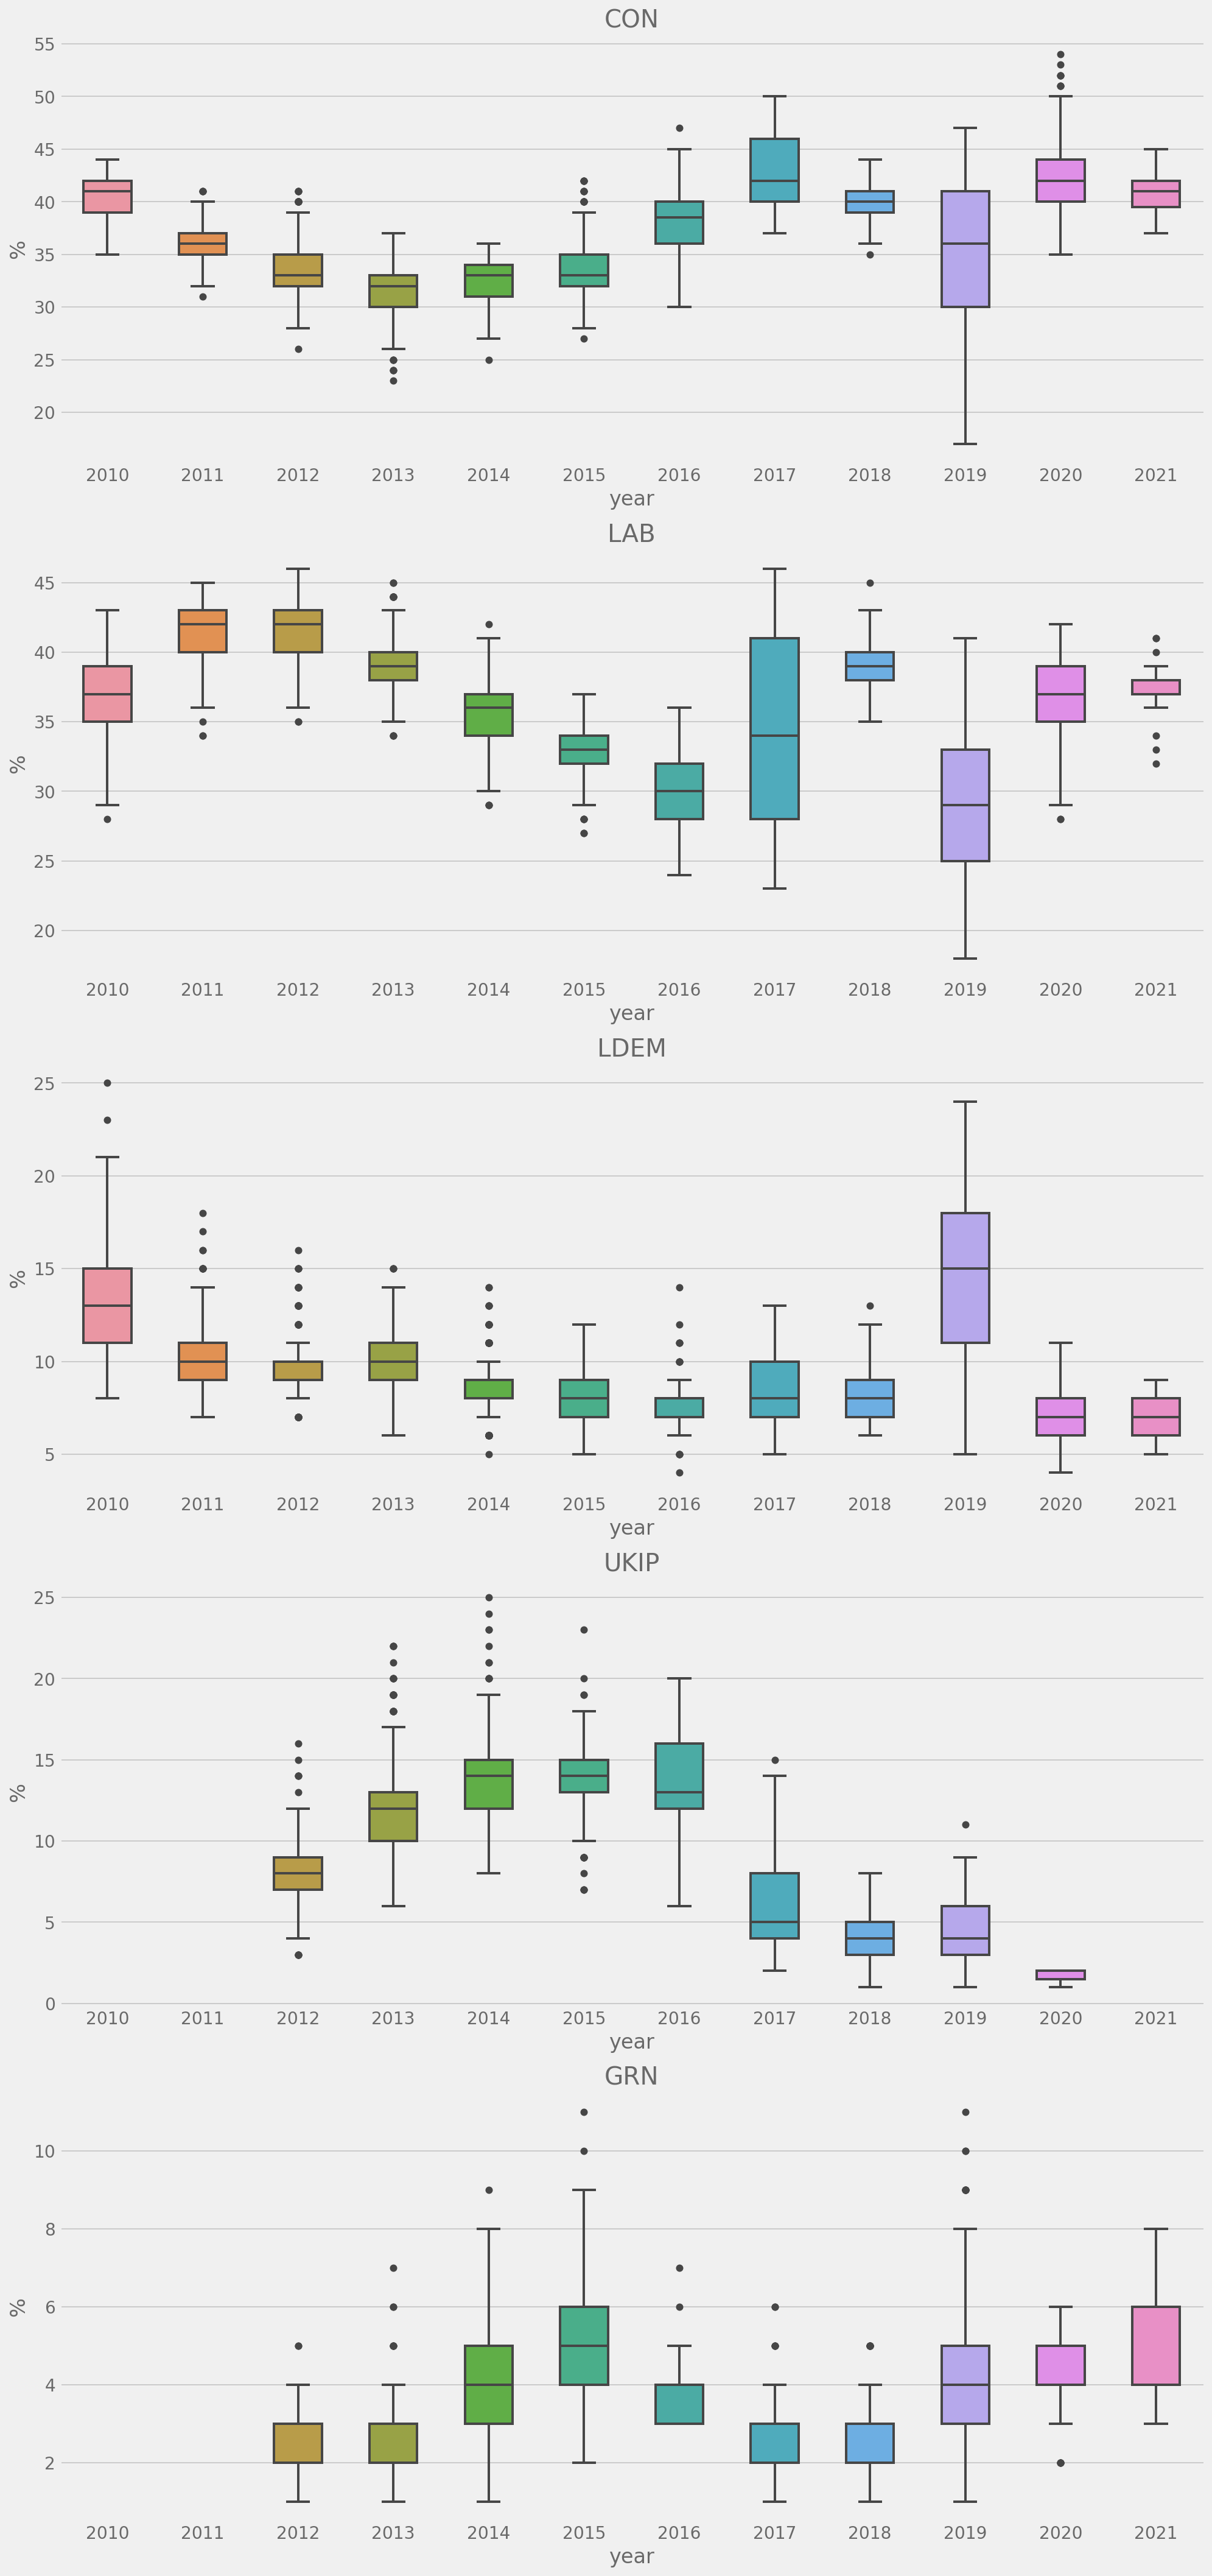

In [31]:
boxprops = {"linewidth": 2}
medianprops = {"linewidth": 2}
whiskerprops = {"linewidth": 2}
capprops = {"linewidth": 2}
flierprops = {"marker": "o"}
fig, axes = plt.subplots(5, 1, figsize=(15, 35))
for party, ax in zip(['CON', 'LAB', 'LDEM', 'UKIP', 'GRN'], axes):
    sns.boxplot(data=df.assign(year=df.index.year), x='year', y=party, width=0.5, ax=ax,
                boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(party)
    ax.set_ylabel("%")

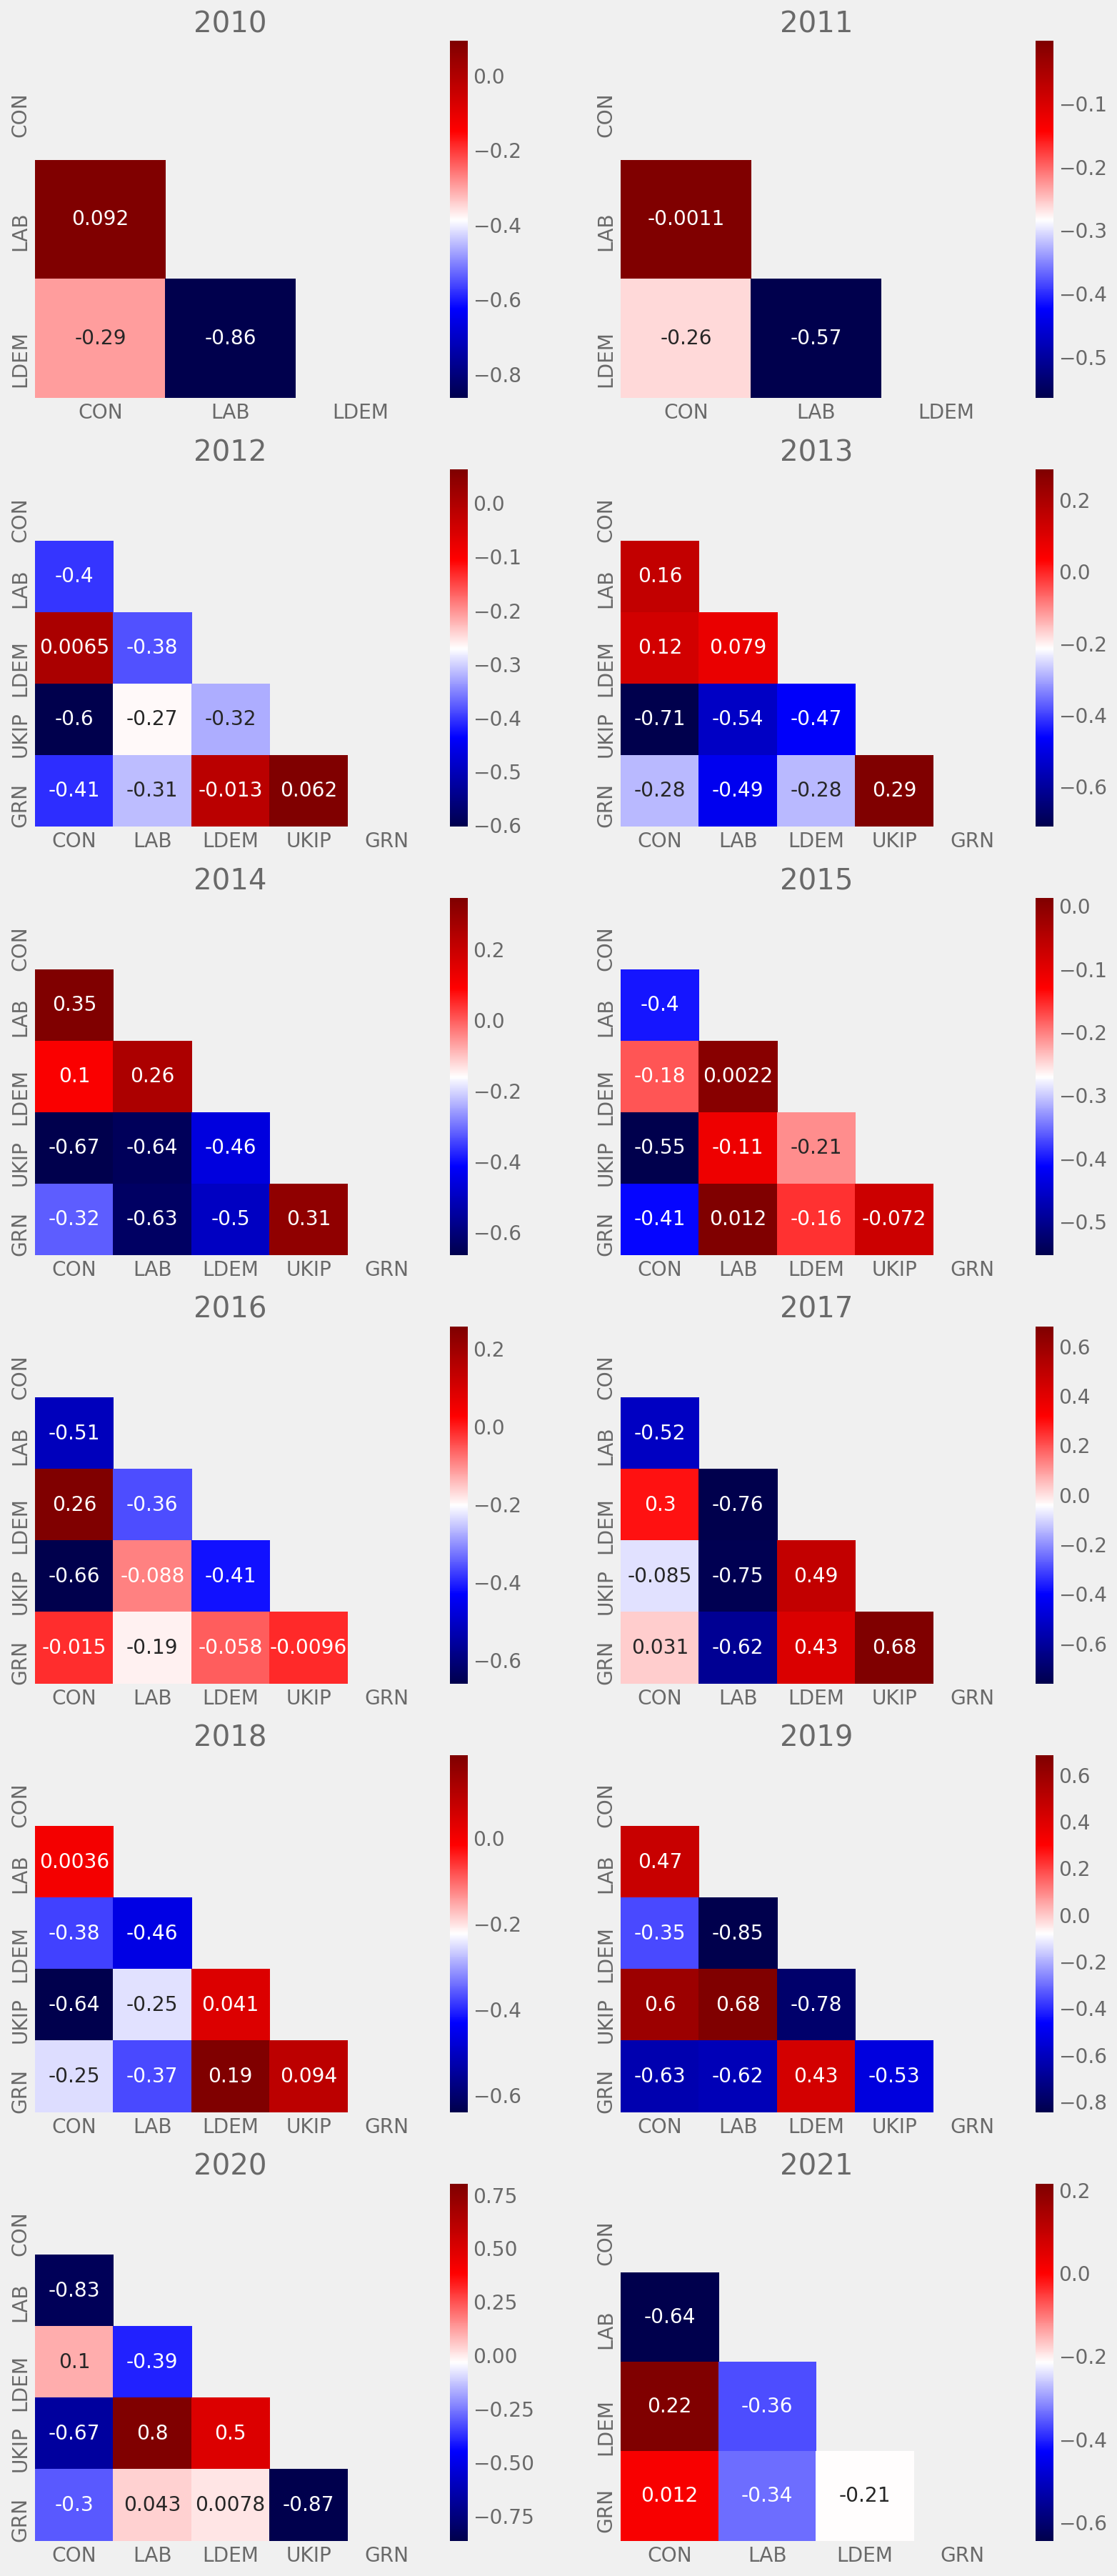

In [32]:
correlations = df.groupby(df.index.year)[['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr().transpose()
fig, axes = plt.subplots(6, 2, figsize=(12, 30))
for year, (i, j) in zip(df.index.year.unique(), product(range(6), range(2))):
    corr = (correlations[year]
            .dropna(how="all", axis="rows")
            .dropna(how="all", axis="columns"))
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr,
                annot=True,
                ax=axes[i][j],
                mask=mask,
                cmap='seismic')
    axes[i][j].set_title(year)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


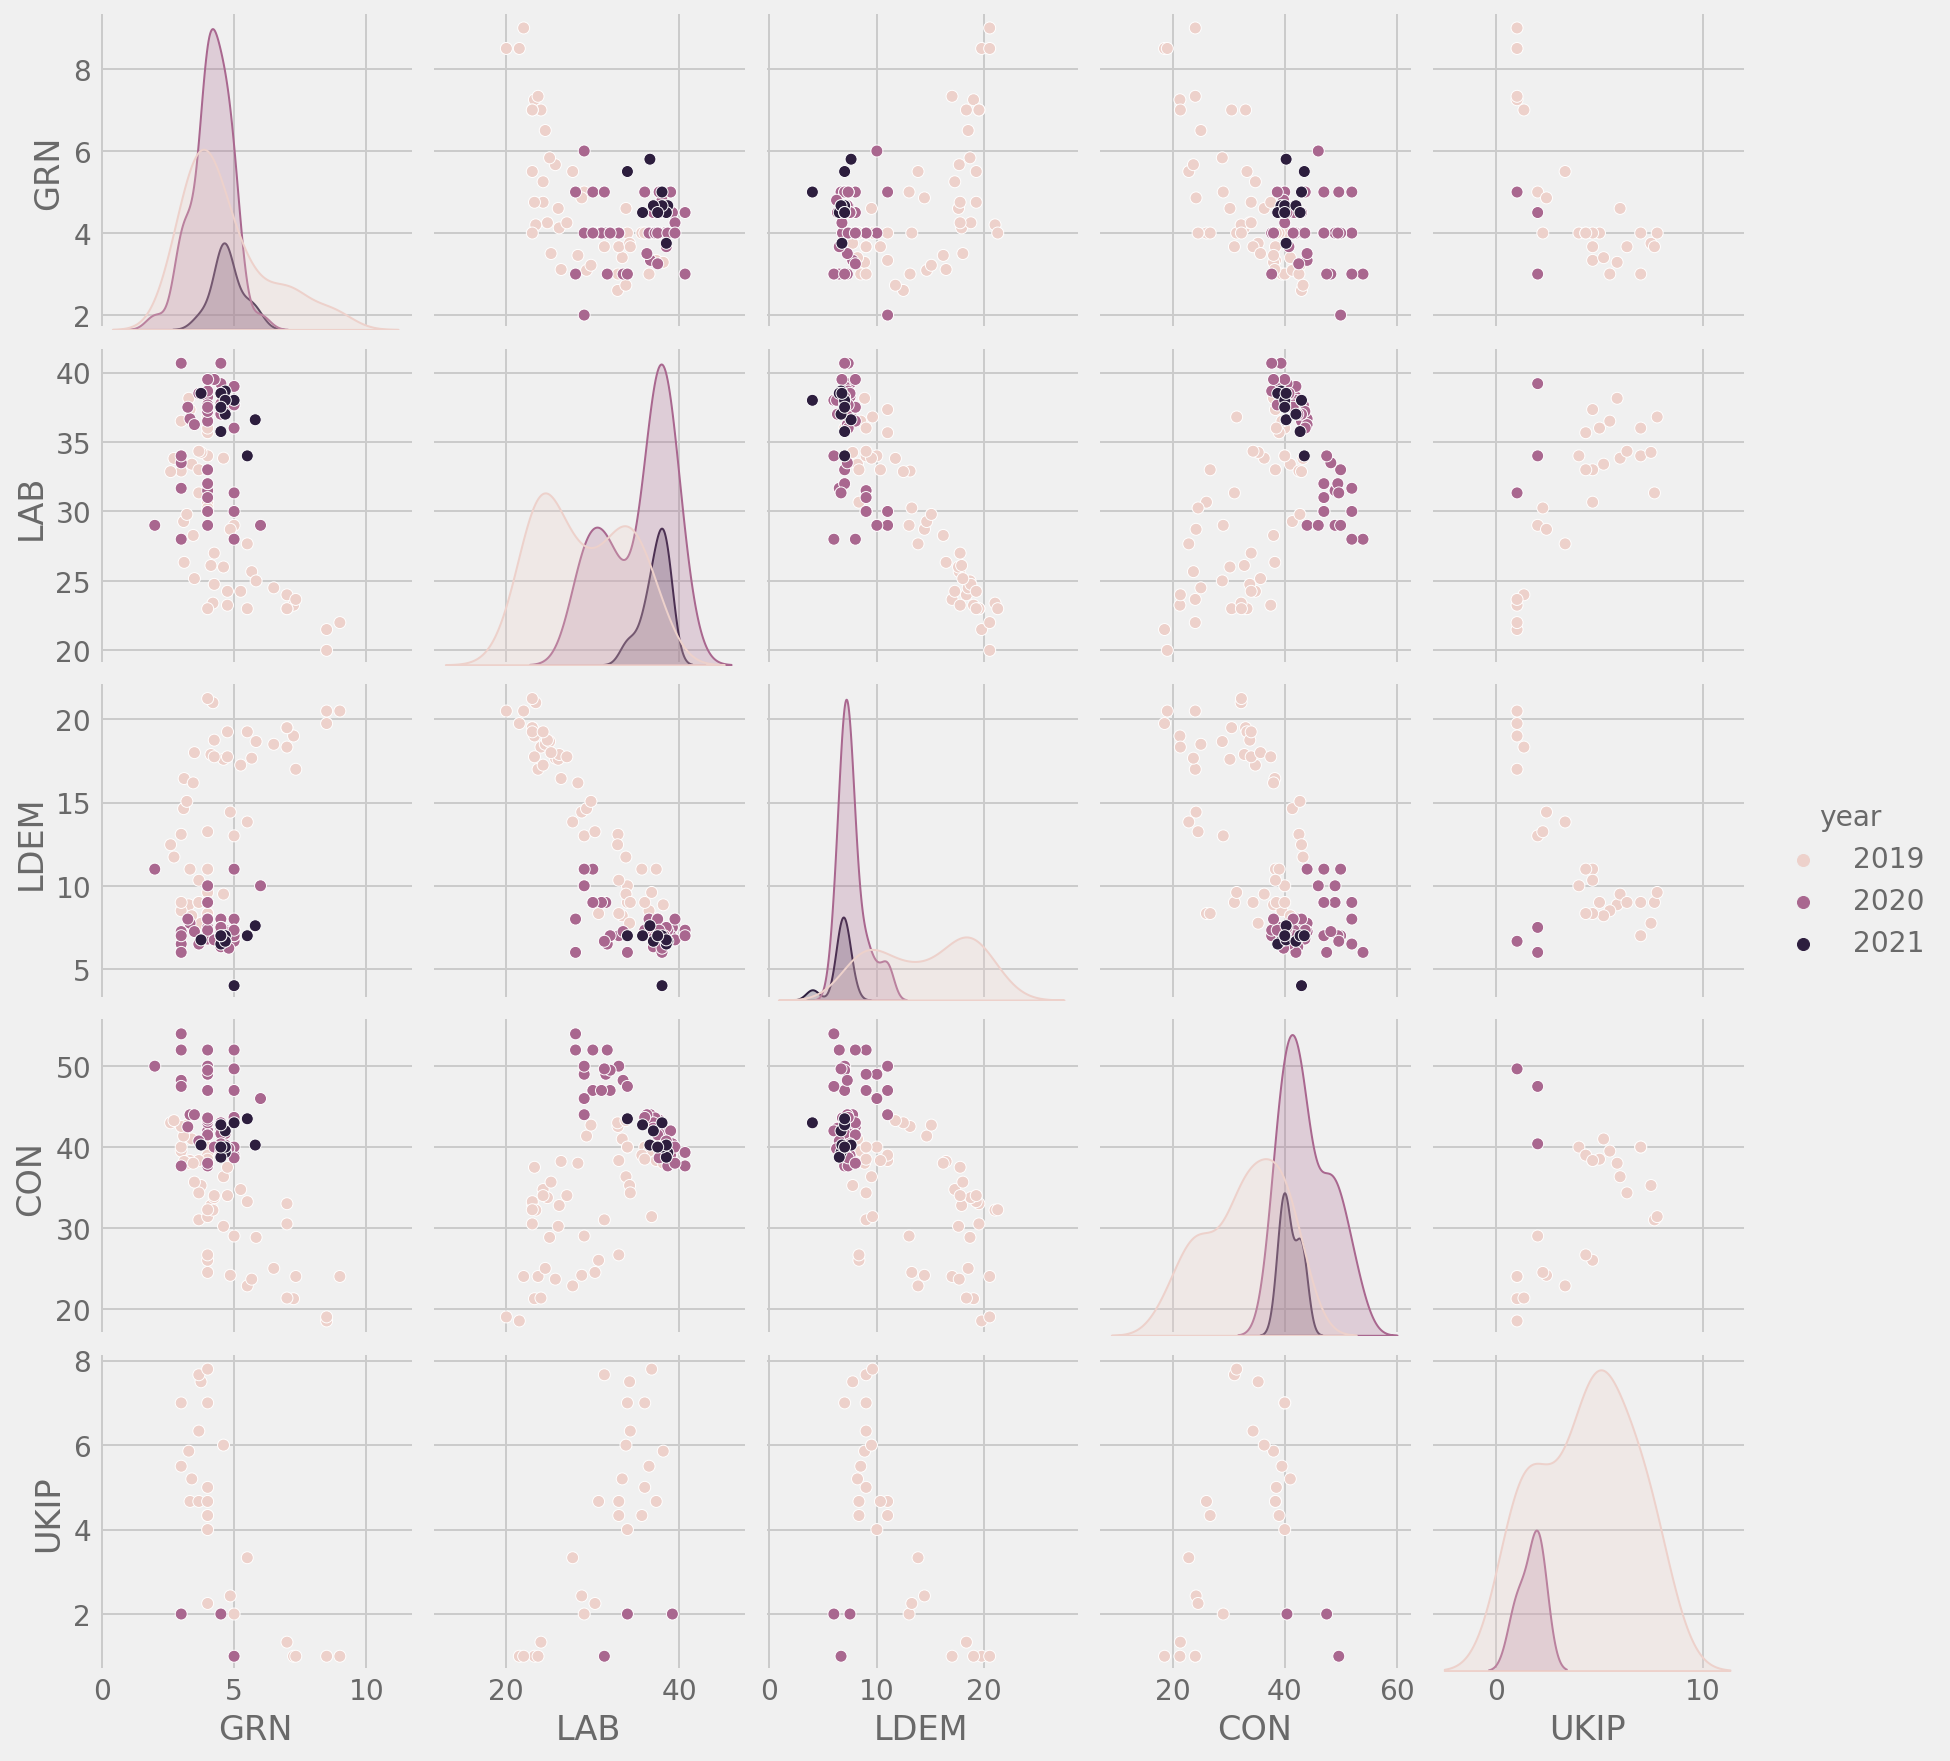

In [29]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2019 <= year <= 2021'),
             hue='year', vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1});

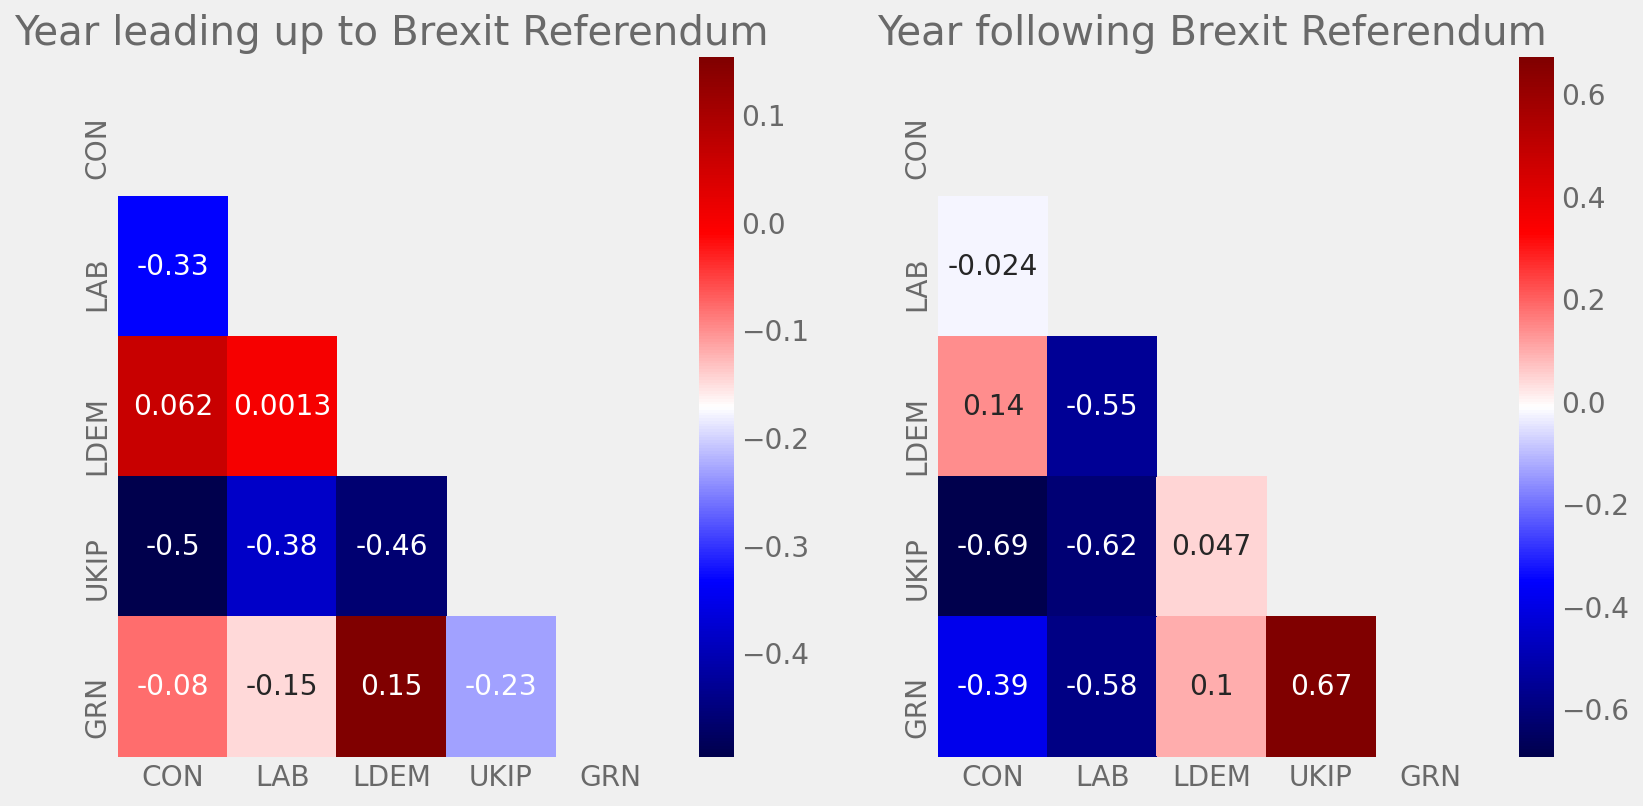

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
corr = df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2016"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax1,
            mask=mask,
            cmap='seismic')
ax1.set_title("Year leading up to Brexit Referendum")
corr = df[(df.index >= pd.to_datetime("23 June 2016")) & (df.index <= pd.to_datetime("23 June 2017"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax2,
            mask=mask,
            cmap='seismic')
ax2.set_title("Year following Brexit Referendum");

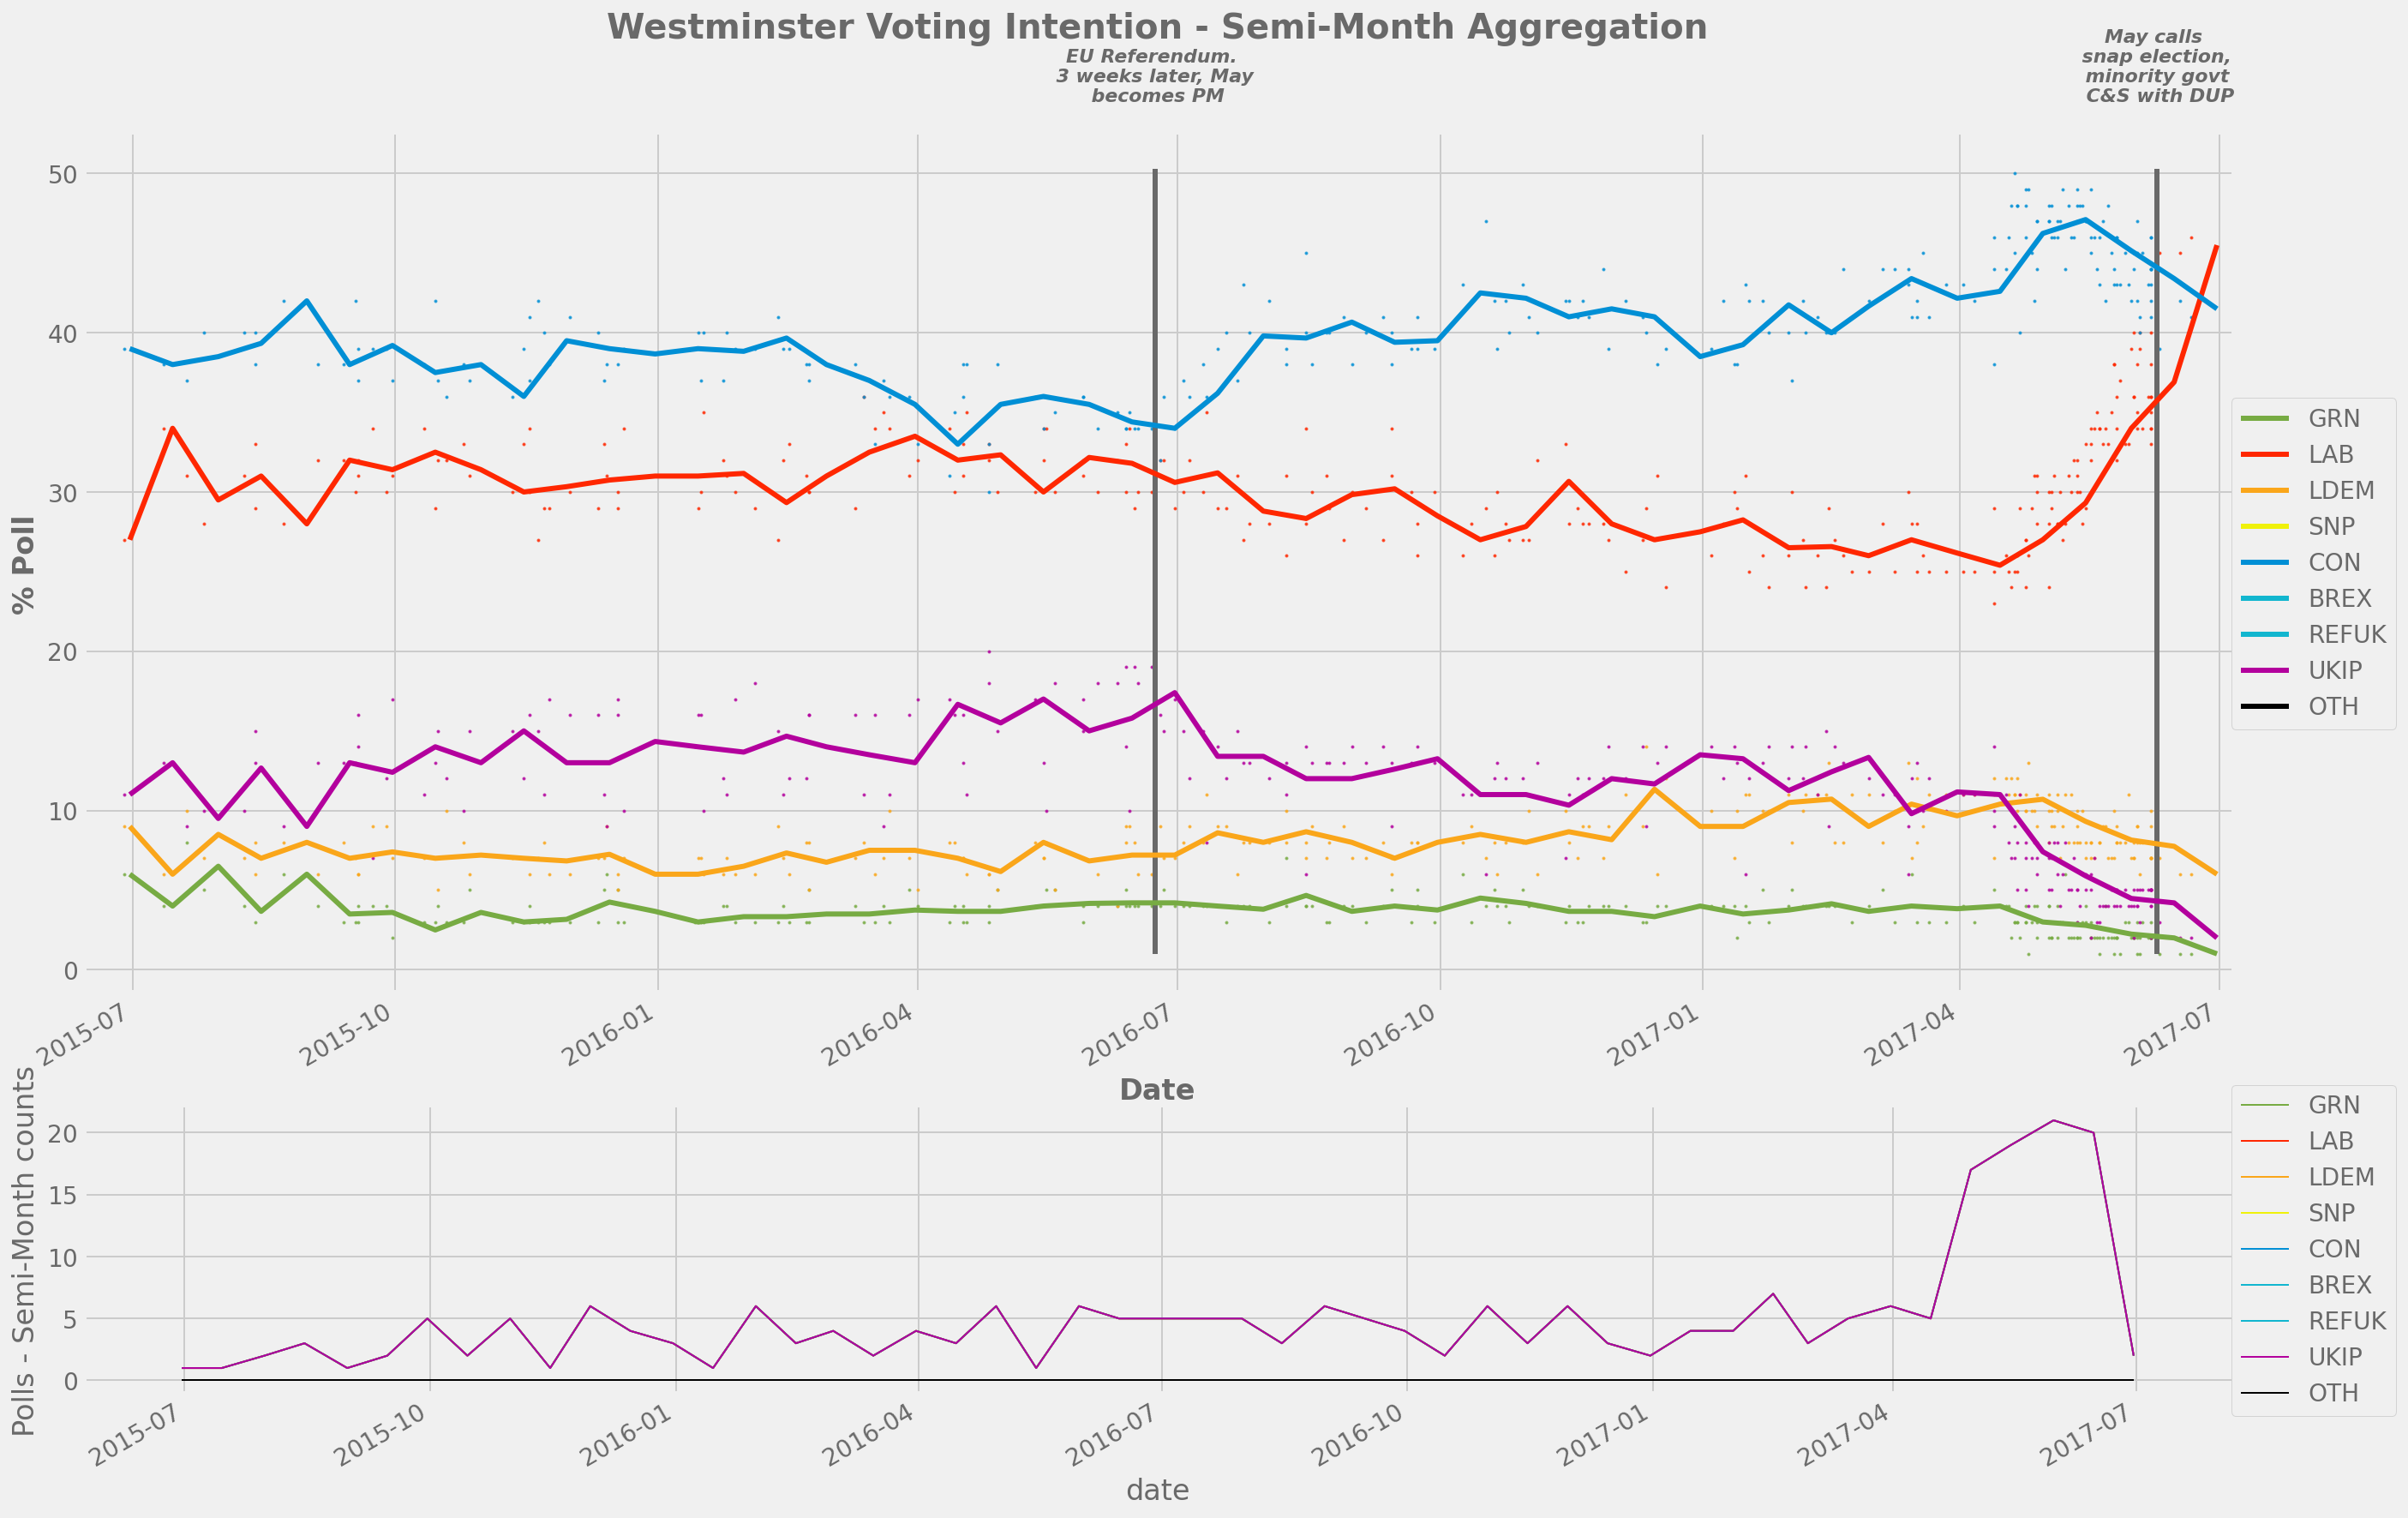

In [34]:
fig, ax = plot_vote_intention(df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2017"))], agg="SM", add_lifetime_context=True)
ax.texts = [text_obj for text_obj in ax.texts
 if (text_obj._x >= pd.to_datetime("23 June 2015")) & (text_obj._x <= pd.to_datetime("23 June 2017"))]